In [1]:
from astropy.io import fits
from astropy import units, constants
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import corner
from voigt_fit_lib import *
import os
import pickle

Load in the files

In [2]:
rootdir = '/Users/thepoetoftwilight/Documents/Astro/Data/PG1522+101/'

First, the FUV files

In [3]:
spec_fits_fuv = fits.open(rootdir + 'FUV/PG1522+101_FUV_wavecal_new.fits')
lsf_fits_fuv = fits.open(rootdir + 'FUV/PG1522_COS_FUV_wavcal2022_lsf_ZQ.fits')

Then, the NUV files

In [4]:
spec_fits_nuv = fits.open(rootdir + 'G185M/PG1522+101_NUV_wavecal_new.fits')
lsf_fits_nuv = fits.open(rootdir + 'G185M/PG1522_COS_NUV_wavcal2022_lsf.fits')

Then, the STIS files

In [5]:
spec_fits_stis = fits.open(rootdir + 'STIS/PG1522+101_E230M_new.fits')
lsf_fits_stis = fits.open(rootdir + 'STIS/PG1522_STIS_NUV_wavcal2022_lsf.fits')

Then, the HIRES files

In [6]:
spec_fits_hires = fits.open(rootdir + 'HIRES/PG1522+101_HIRES.fits')
lsf_fits_hires = fits.open(rootdir + 'HIRES/PG1522_HIRES_wavcal2023_lsf.fits')

Compile a list of the spectra, continuum nodes, and IDs for all detectors

In [7]:
spec_fits_list = [spec_fits_fuv, spec_fits_nuv, spec_fits_stis, spec_fits_hires]
lsf_fits_list = [lsf_fits_fuv, lsf_fits_nuv, lsf_fits_stis, lsf_fits_hires]

Systemic redshift

In [8]:
z_sys = 1.25937492 #1.25937477 #1.25937372 #1.2594

In [9]:
np.round(1.25937477 + ((1+1.25937477)*0.02/3e+5), 8)

1.25937492

# CIV

## CIV 1548

In [10]:
civ_1548_hires = ion_transition('CIV', 1548, 'C', z_sys, 'HIRES')

In [11]:
civ_1548_hires.grab_ion_transition_info()

In [12]:
civ_1548_hires.grab_ion_transition_spec(spec_fits_list)

In [13]:
civ_1548_hires.cont_norm_flux(v_abs_range=[-50,50], degree=1)

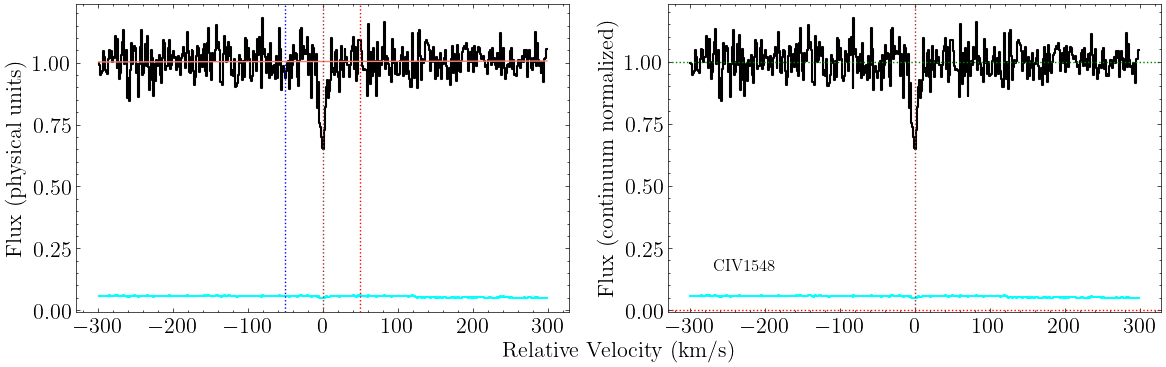

In [14]:
fig, ax = civ_1548_hires.plot_ion_transition_spec_cont()

In [24]:
def g(x, s, A=.6):
    return 1-A*np.exp(-x**2/(2*s**2))

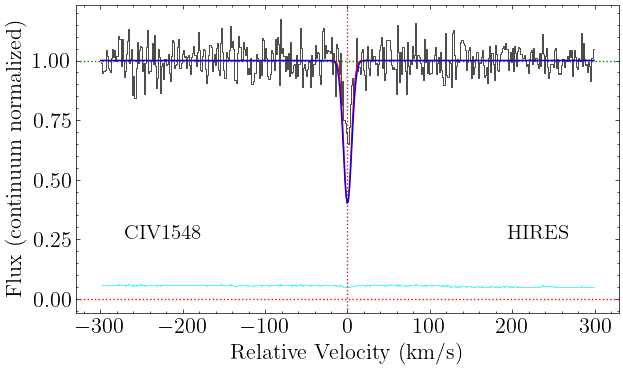

In [29]:
fig, ax = civ_1548_hires.plot_ion_transition_spec()

x = civ_1548_hires.v
g1 = g(x, 4.6)
g2 = g(x, 5.2)

ax.plot(x, g1, color='red')
ax.plot(x, g2, color='blue')

In [15]:
#civ_1548_nuv.get_EW_total(-50,50)

In [16]:
civ_1548_hires.grab_ion_transition_lsf(lsf_fits_list)

In [17]:
civ_1548_hires.init_ion_transition(init_values = np.array([[13.0, 10, 0]]), 
                             lsf_convolve = True)

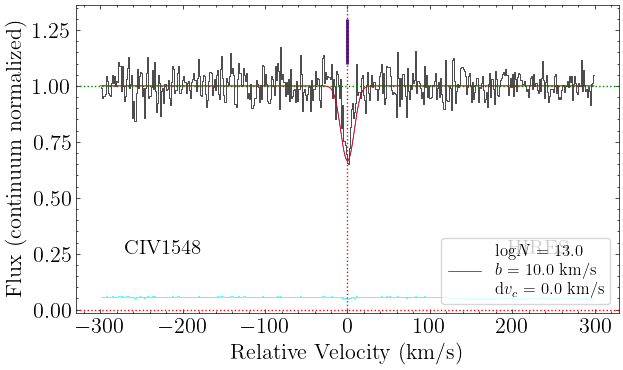

In [18]:
fig, ax = civ_1548_hires.plot_ion_transition_init_fit()

In [19]:
civ_1548_hires.fit_ion_transition()

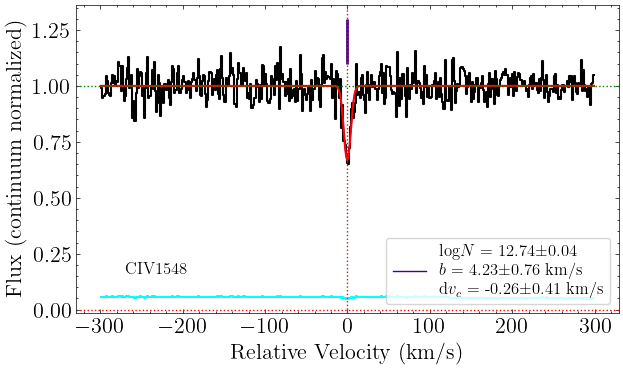

In [20]:
fig, ax = civ_1548_hires.plot_ion_transition_best_fit()

## CIV 1550

In [21]:
civ_1550_hires = ion_transition('CIV', 1550, 'C', z_sys, 'HIRES')

In [22]:
civ_1550_hires.grab_ion_transition_info()

In [23]:
civ_1550_hires.grab_ion_transition_spec(spec_fits_list)

In [24]:
civ_1550_hires.cont_norm_flux(v_abs_range=[-50,50], degree=1)

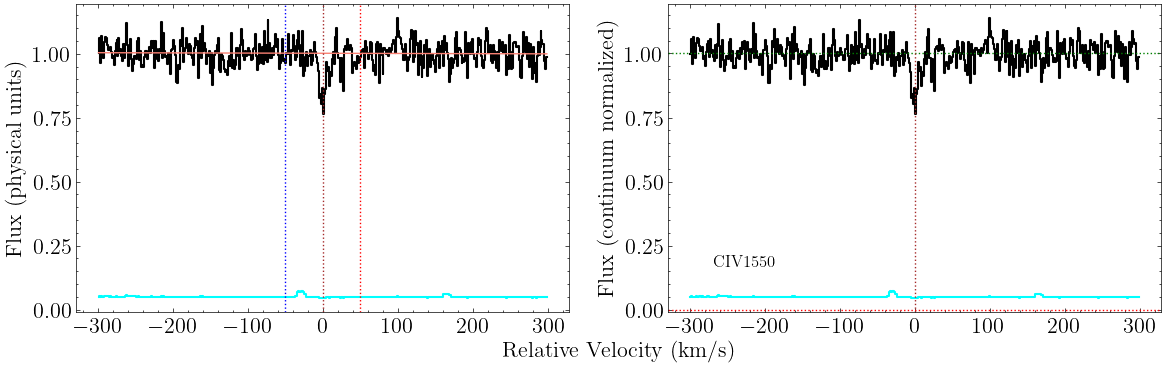

In [25]:
fig, ax = civ_1550_hires.plot_ion_transition_spec_cont()

In [26]:
#civ_1548_nuv.get_EW_total(-50,50)

In [27]:
civ_1550_hires.grab_ion_transition_lsf(lsf_fits_list)

In [28]:
civ_1550_hires.init_ion_transition(init_values = np.array([[13.0, 5, 0]]), 
                             lsf_convolve = True)

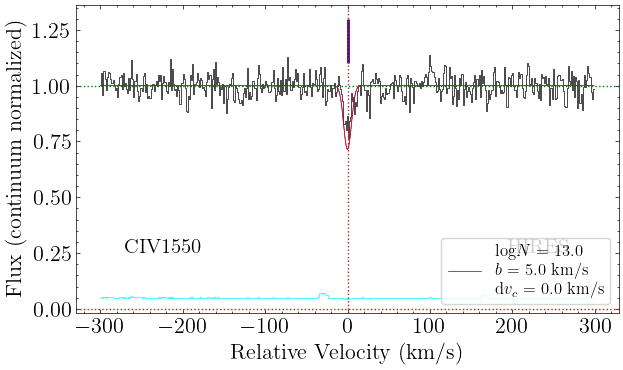

In [29]:
fig, ax = civ_1550_hires.plot_ion_transition_init_fit()

In [30]:
civ_1550_hires.fit_ion_transition()

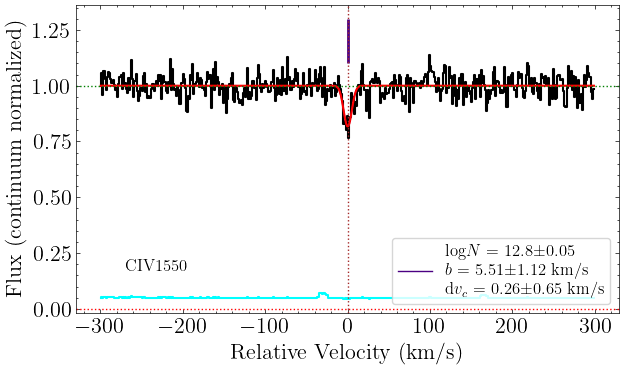

In [31]:
fig, ax = civ_1550_hires.plot_ion_transition_best_fit()

## CIV ion

In [32]:
civ = ion(z_sys, 'CIV', [civ_1548_hires, civ_1550_hires])

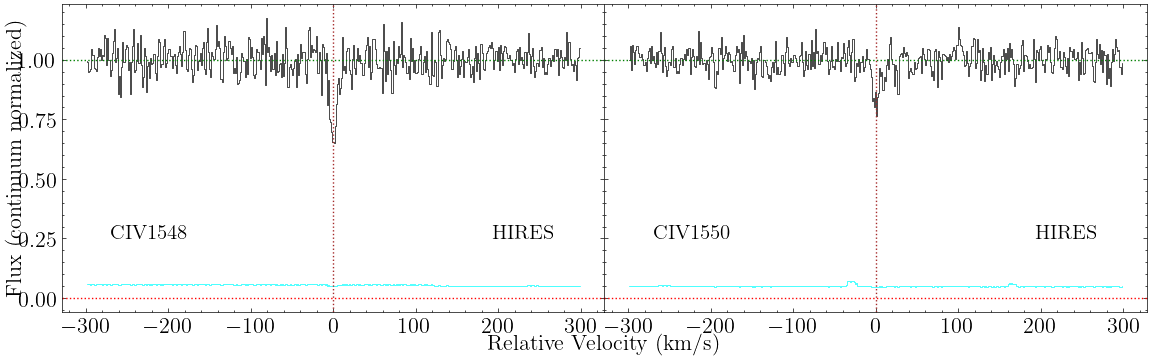

In [33]:
fig, axes = civ.plot_ion()

In [34]:
civ.init_ion([[[12.85, 5, 0]],
              [[12.85, 5, 0]]])

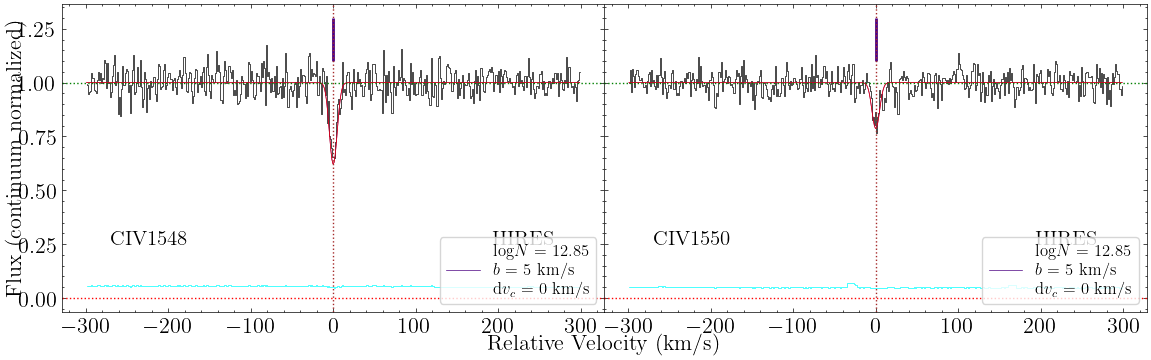

In [35]:
fig, axes = civ.plot_ion_init_fit()

In [36]:
civ.fit_ion(tie_params_list = [['it1c1_logN', 'it2c1_logN'],
                               ['it1c1_b', 'it2c1_b'],
                               ['it1c1_dv_c', 'it2c1_dv_c'],
                              ])

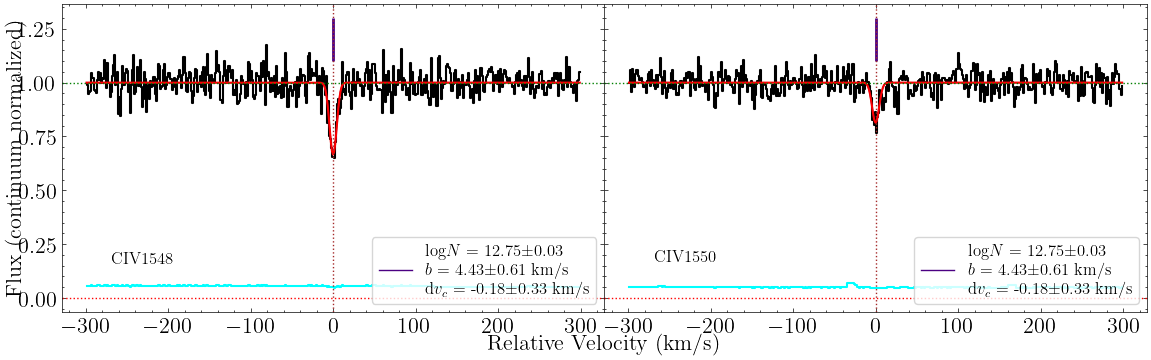

In [37]:
fig, axes = civ.plot_ion_best_fit()

In [38]:
#civ.fit_ion_emcee(loaddir=rootdir, scale_covar=1e-7, n_walkers=100, n_steps=2500)
#civ.fit_ion_emcee(load=True, loaddir=rootdir)

In [39]:
#fig, axes = civ.plot_samples()

In [40]:
#civ.plot_corner()

# CIII

## CIII 977

In [41]:
ciii_977_stis = ion_transition('CIII', 977, 'C', z_sys, 'STIS')

In [42]:
ciii_977_stis.grab_ion_transition_info(delta_v=5)

In [43]:
ciii_977_stis.grab_ion_transition_spec(spec_fits_list, masks=[[-70,-20],[40,140]])

In [44]:
ciii_977_stis.cont_norm_flux(v_abs_range=[-100,100], degree=1)

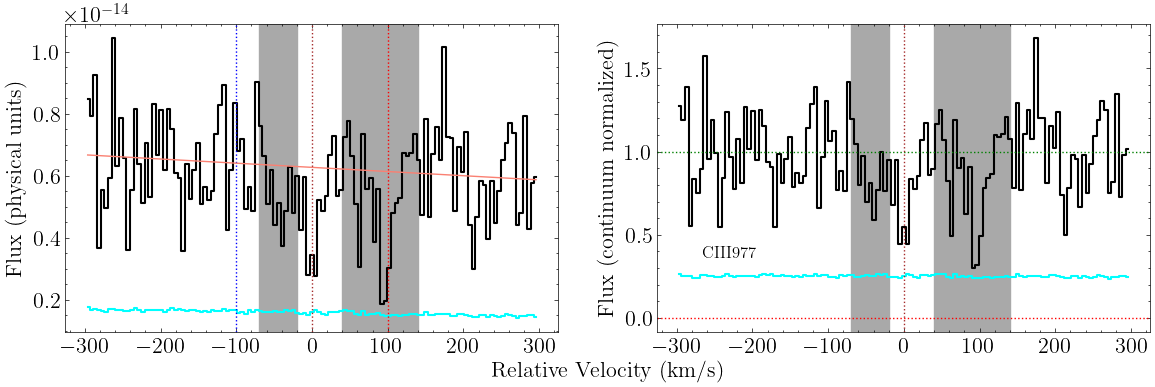

In [45]:
fig, ax = ciii_977_stis.plot_ion_transition_spec_cont()

In [46]:
ciii_977_stis.grab_ion_transition_lsf(lsf_fits_list)

In [47]:
ciii_977_stis.init_ion_transition(init_values = np.array([[13.0, 5, 0]]), 
                             lsf_convolve = True)

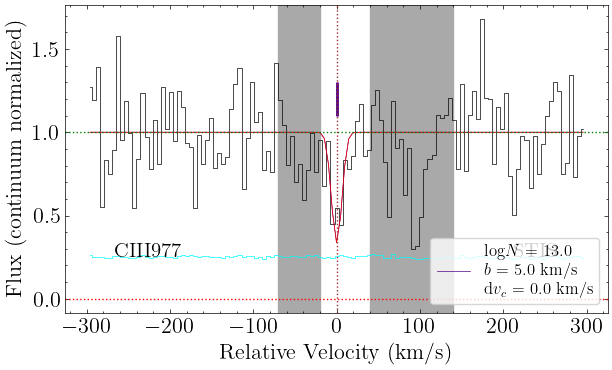

In [48]:
fig, ax = ciii_977_stis.plot_ion_transition_init_fit()

In [49]:
ciii_977_stis.fit_ion_transition()

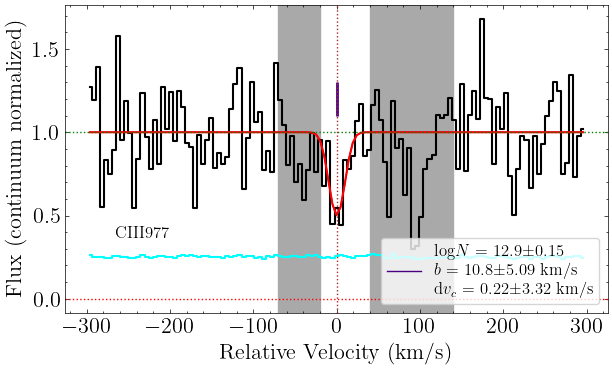

In [50]:
fig, ax = ciii_977_stis.plot_ion_transition_best_fit()

## CIII ion

In [51]:
ciii = ion(z_sys, 'CIII', [ciii_977_stis])

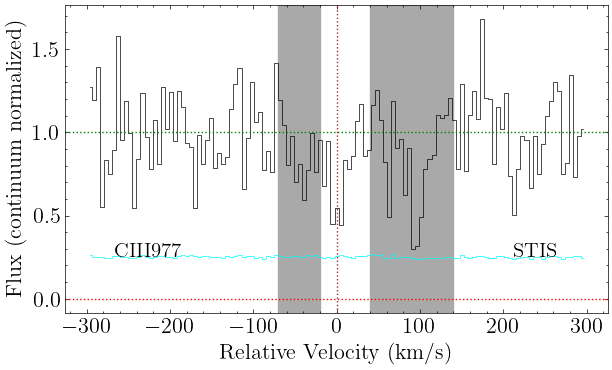

In [52]:
fig, axes = ciii.plot_ion()

In [53]:
ciii.init_ion([[[12.85, 6, 0]]])

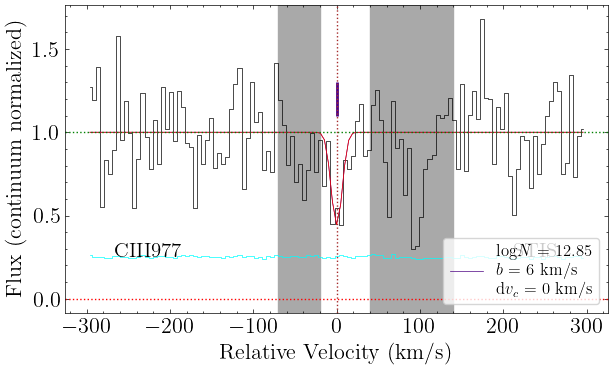

In [54]:
fig, axes = ciii.plot_ion_init_fit()

In [55]:
ciii.fit_ion(fix_params_list=['it1c1_dv_c', 'it1c1_b'],
            upper_bounds_dict = {'it1c1_logN':14.3})

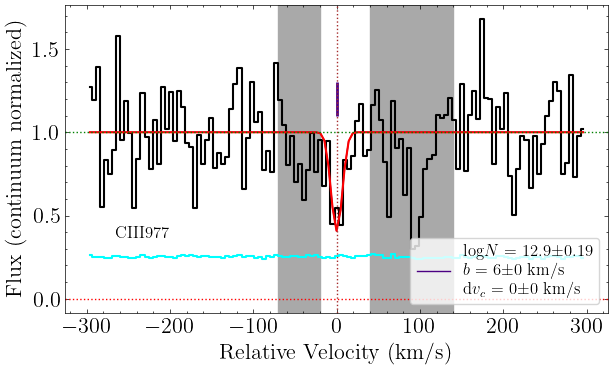

In [56]:
fig, axes = ciii.plot_ion_best_fit()

In [57]:
#ciii.fit_ion_emcee(loaddir=rootdir, scale_covar=1e-7, n_walkers=100, n_steps=2500)
#ciii.fit_ion_emcee(load=True, loaddir=rootdir)

In [58]:
#fig, axes = ciii.plot_samples()

In [59]:
#ciii.plot_corner()

# OIV

## OIV 553

In [60]:
oiv_553_fuv = ion_transition('OIV', 553, 'O', z_sys, 'COS FUV')

In [61]:
oiv_553_fuv.grab_ion_transition_info()

In [62]:
oiv_553_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-250],[25,250]])

In [63]:
oiv_553_fuv.cont_norm_flux(v_abs_range=[-50,50], degree=1)

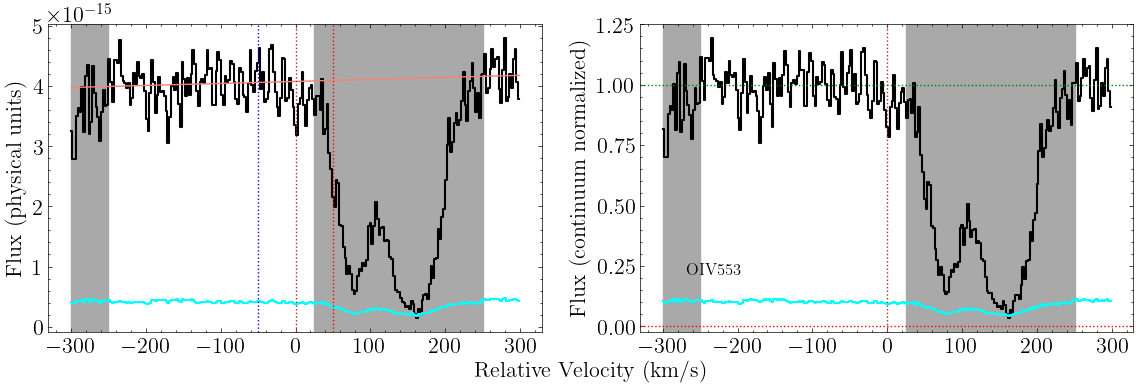

In [64]:
fig, ax = oiv_553_fuv.plot_ion_transition_spec_cont()

In [65]:
oiv_553_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [66]:
oiv_553_fuv.init_ion_transition(init_values = np.array([[13.4, 10, 0]]), 
                             lsf_convolve = True)

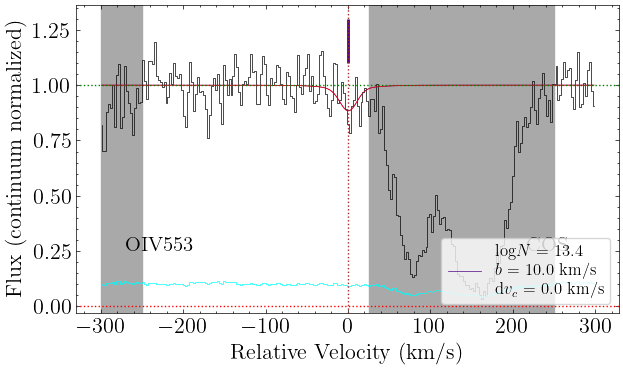

In [67]:
fig, ax = oiv_553_fuv.plot_ion_transition_init_fit()

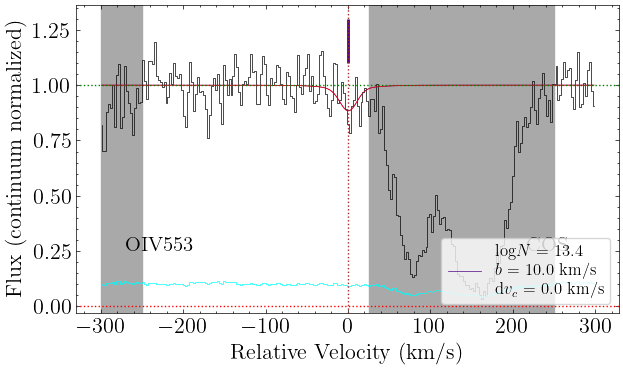

In [68]:
fig, ax = oiv_553_fuv.plot_ion_transition_init_fit()

In [69]:
oiv_553_fuv.fit_ion_transition()

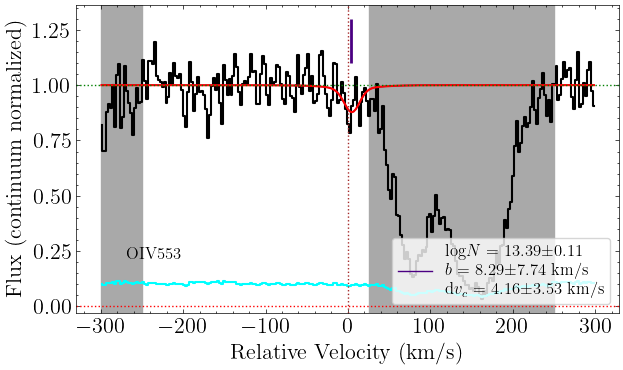

In [70]:
fig, ax = oiv_553_fuv.plot_ion_transition_best_fit()

## OIV 554

In [71]:
oiv_554_fuv = ion_transition('OIV', 554, 'O', z_sys, 'COS FUV')

In [72]:
oiv_554_fuv.grab_ion_transition_info(delta_v=-2.21)

In [73]:
oiv_554_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-60],[20,100],[140,300]])

In [74]:
oiv_554_fuv.cont_norm_flux(v_abs_range=[-30,20], degree=1)

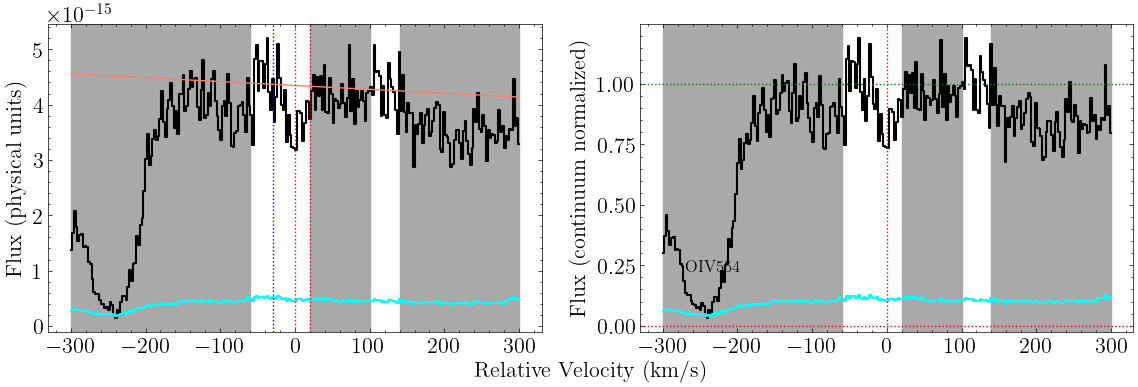

In [75]:
fig, ax = oiv_554_fuv.plot_ion_transition_spec_cont()

In [76]:
#civ_1548_nuv.get_EW_total(-50,50)

In [77]:
oiv_554_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [78]:
oiv_554_fuv.init_ion_transition(init_values = np.array([[13.6, 5, 0]]), 
                             lsf_convolve = True)

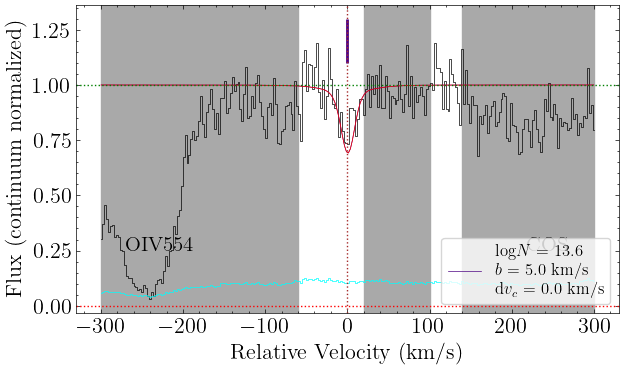

In [79]:
fig, ax = oiv_554_fuv.plot_ion_transition_init_fit()

In [80]:
oiv_554_fuv.fit_ion_transition()

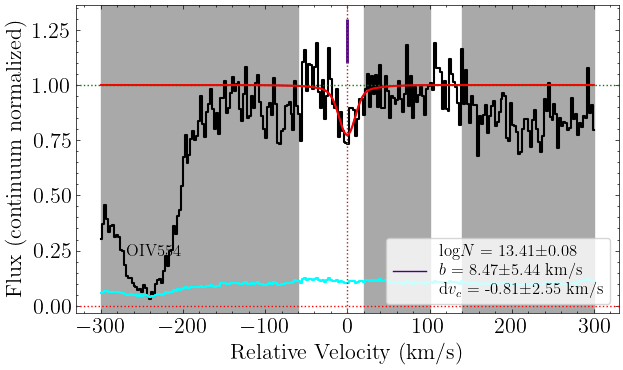

In [81]:
fig, ax = oiv_554_fuv.plot_ion_transition_best_fit()

## OIV 608

In [82]:
oiv_608_fuv = ion_transition('OIV', 608, 'O', z_sys, 'COS FUV')

In [83]:
oiv_608_fuv.grab_ion_transition_info()

In [84]:
oiv_608_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[200,300]])

In [85]:
oiv_608_fuv.cont_norm_flux(v_abs_range=[-50,50], degree=1)

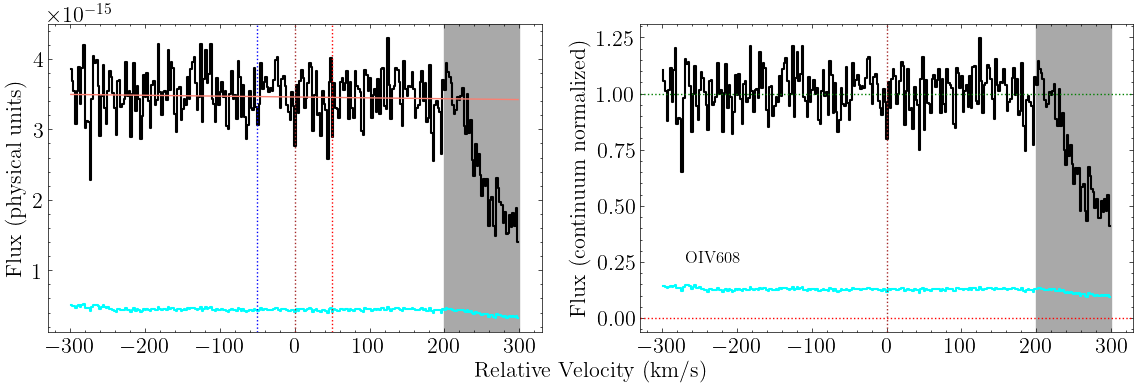

In [86]:
fig, ax = oiv_608_fuv.plot_ion_transition_spec_cont()

In [87]:
oiv_608_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [88]:
oiv_608_fuv.init_ion_transition(init_values = np.array([[13.41, 8, 0]]), 
                             lsf_convolve = True)

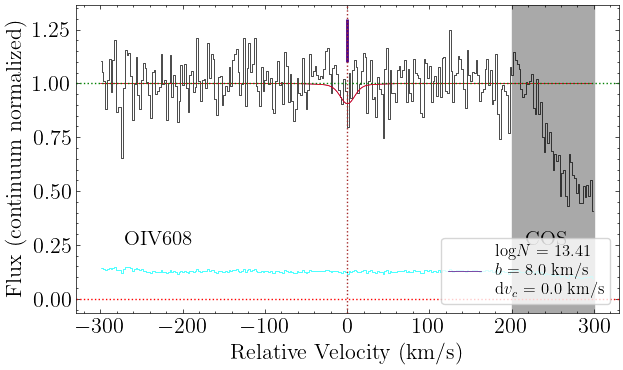

In [89]:
fig, ax = oiv_608_fuv.plot_ion_transition_init_fit()

## OIV 787

In [90]:
oiv_787_fuv = ion_transition('OIV', 787, 'O', z_sys, 'COS FUV')

In [91]:
oiv_787_fuv.grab_ion_transition_info()

In [92]:
oiv_787_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-260],[20,100],[180,300]])

In [93]:
oiv_787_fuv.cont_norm_flux(v_abs_range=[-50,50], degree=1)

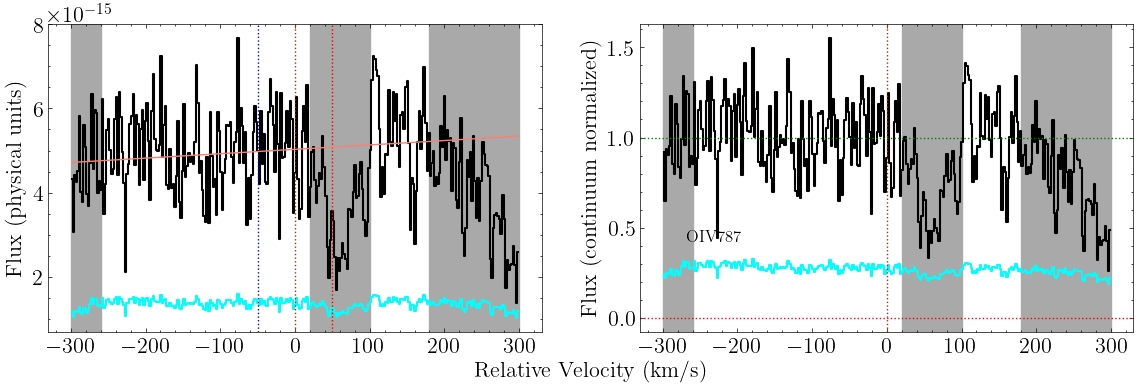

In [94]:
fig, ax = oiv_787_fuv.plot_ion_transition_spec_cont()

In [95]:
oiv_787_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [96]:
oiv_787_fuv.init_ion_transition(init_values = np.array([[13.4, 10, 0]]), 
                             lsf_convolve = True)

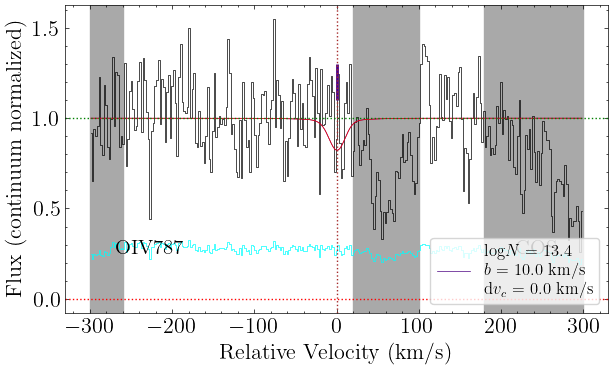

In [97]:
fig, ax = oiv_787_fuv.plot_ion_transition_init_fit()

In [98]:
oiv_787_fuv.fit_ion_transition()

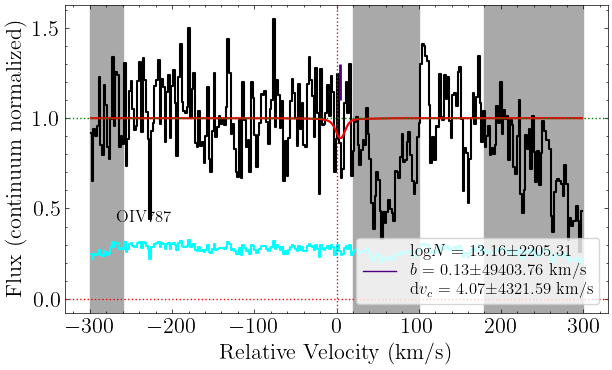

In [99]:
fig, ax = oiv_787_fuv.plot_ion_transition_best_fit()

## OIV ion

In [100]:
oiv = ion(z_sys, 'OIV', [oiv_553_fuv, oiv_554_fuv])

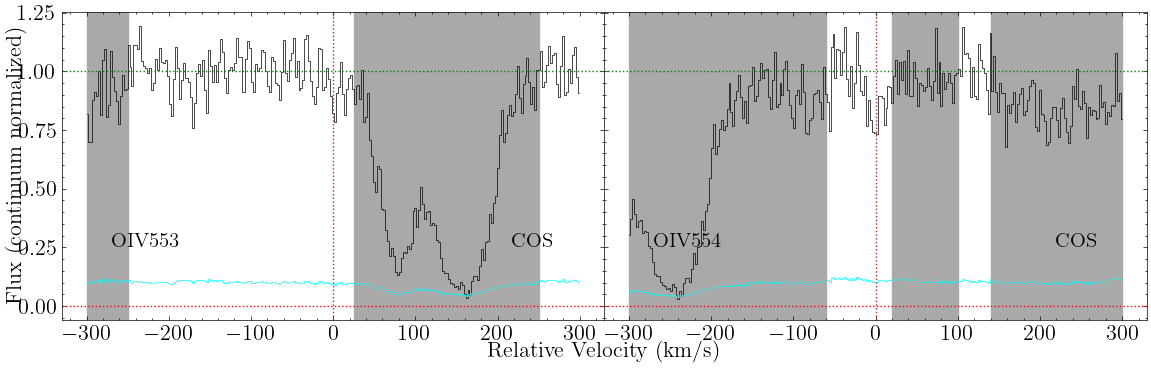

In [101]:
fig, axes = oiv.plot_ion()

In [102]:
oiv.init_ion([[[13.41, 6, 0]],
              [[13.41, 6, 0]]])

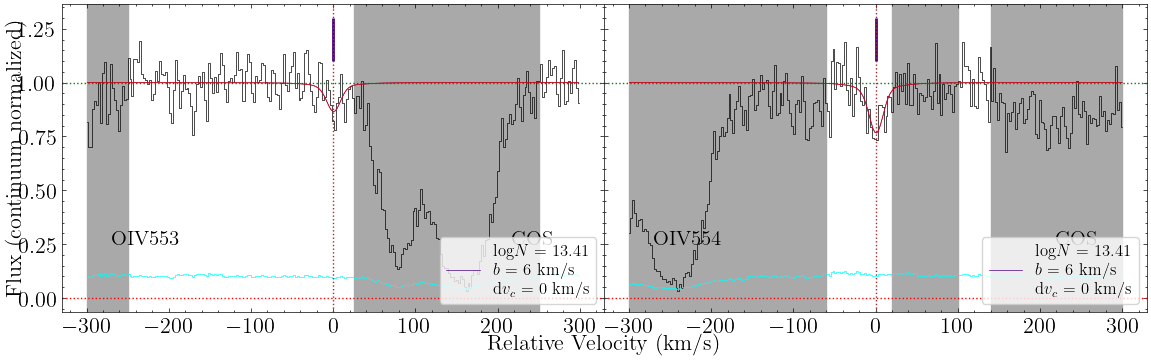

In [103]:
fig, axes = oiv.plot_ion_init_fit()

In [104]:
oiv.fit_ion(tie_params_list = [['it1c1_logN', 'it2c1_logN'],
                               ['it1c1_b', 'it2c1_b'],
                               ['it1c1_dv_c', 'it2c1_dv_c'],
                              ],
            fix_params_list = ['it1c1_b', 'it1c1_dv_c'],
           upper_bounds_dict = {'it1c1_logN':14})

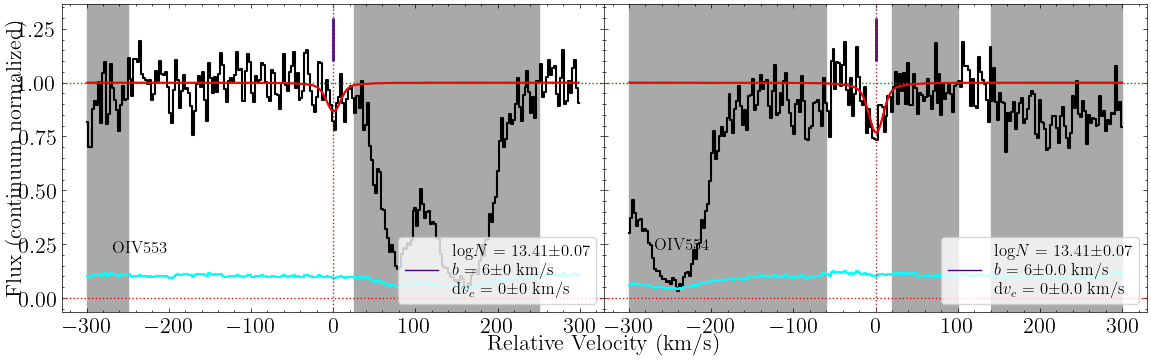

In [105]:
fig, axes = oiv.plot_ion_best_fit()

In [106]:
#oiv.fit_ion_emcee(loaddir=rootdir, scale_covar=1e-7, n_walkers=100, n_steps=2500)
#oiv.fit_ion_emcee(load=True, loaddir=rootdir)

In [107]:
#fig, axes = oiv.plot_samples()

In [108]:
#oiv.plot_corner()

# HI

## HI 1215

In [109]:
hi_1215_stis = ion_transition('HI', 1215, 'H', z_sys, 'STIS')

In [110]:
hi_1215_stis.grab_ion_transition_info()

In [111]:
hi_1215_stis.grab_ion_transition_spec(spec_fits_list, masks=[[-270,-80]])

In [112]:
hi_1215_stis.cont_norm_flux(v_abs_range=[-270,60], degree=1)

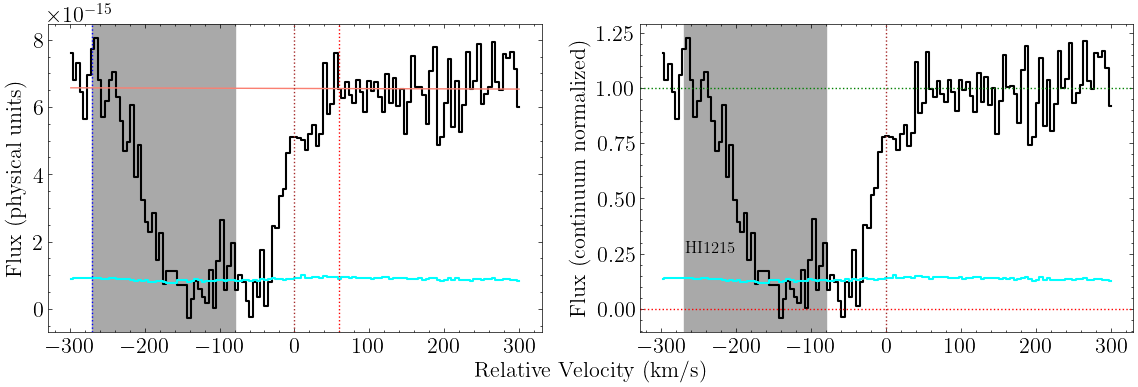

In [113]:
fig, ax = hi_1215_stis.plot_ion_transition_spec_cont()

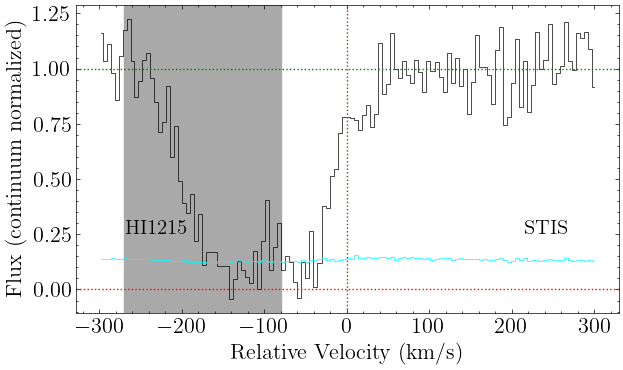

In [114]:
fig, ax = hi_1215_stis.plot_ion_transition_spec()

In [115]:
hi_1215_stis.grab_ion_transition_lsf(lsf_fits_list)

In [116]:
hi_1215_stis.init_ion_transition(init_values = np.array([[12.7, 15, 0],
                                                         [13.7, 20,-80],
                                                         [13.9, 20,-45],
                                                         [12.7, 15, 20]]), 
                             lsf_convolve = True)

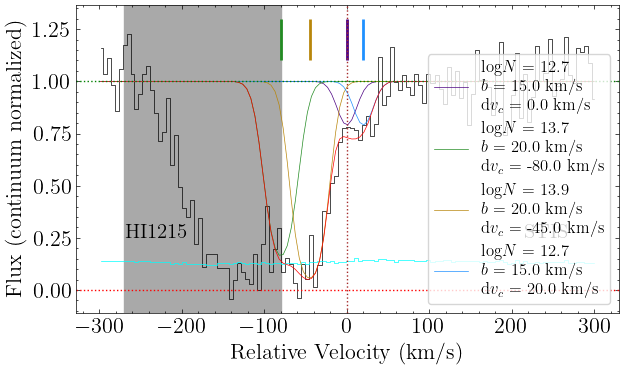

In [117]:
fig, ax = hi_1215_stis.plot_ion_transition_init_fit()

In [118]:
hi_1215_stis.fit_ion_transition(fix_params_list = ['it1c1_dv_c',
                                                   'it1c2_dv_c',
                                                   'it1c3_dv_c',
                                                   'it1c4_dv_c'])

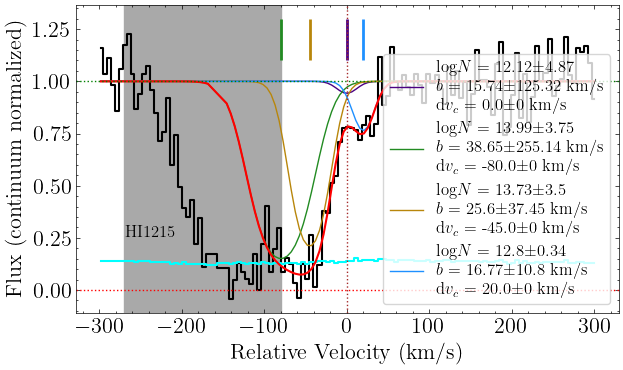

In [119]:
fig, ax = hi_1215_stis.plot_ion_transition_best_fit()

## HI 1025

In [120]:
hi_1025_stis = ion_transition('HI', 1025, 'H', z_sys, 'STIS')

In [121]:
hi_1025_stis.grab_ion_transition_info()

In [122]:
hi_1025_stis.grab_ion_transition_spec(spec_fits_list, masks=[[-230,-80]])

In [123]:
hi_1025_stis.cont_norm_flux(v_abs_range=[-250,50], degree=1)

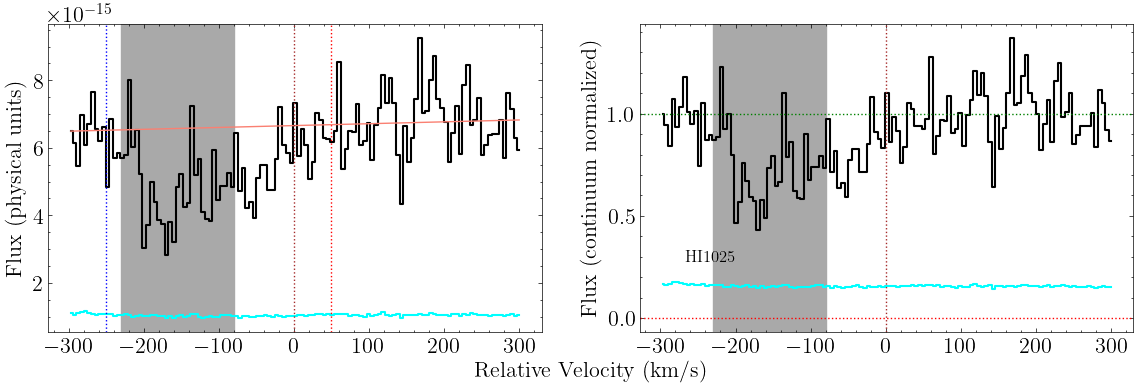

In [124]:
fig, axes = hi_1025_stis.plot_ion_transition_spec_cont()

In [125]:
hi_1025_stis.grab_ion_transition_lsf(lsf_fits_list)

In [126]:
hi_1025_stis.init_ion_transition(init_values = np.array([[12.7, 15, 0],
                                                         [13.7, 20,-80],
                                                         [13.9, 20,-45],
                                                         [12.7, 15, 20]]), 
                             lsf_convolve = True)

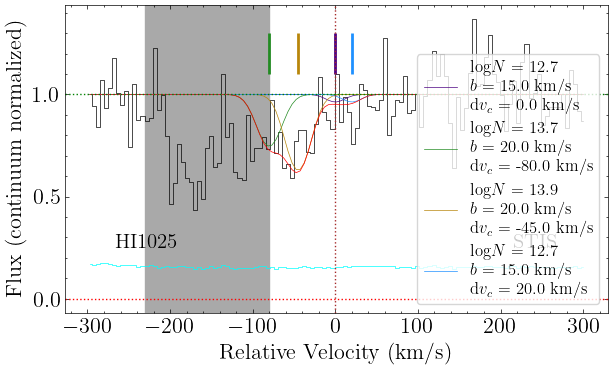

In [127]:
fig, ax = hi_1025_stis.plot_ion_transition_init_fit()

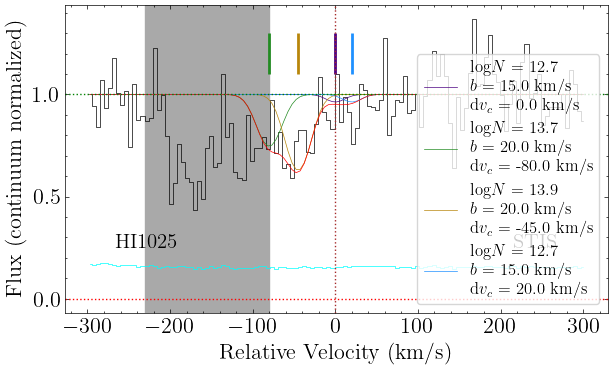

In [128]:
fig, ax = hi_1025_stis.plot_ion_transition_init_fit()

In [129]:
hi_1025_stis.fit_ion_transition(fix_params_list = ['it1c1_dv_c'])

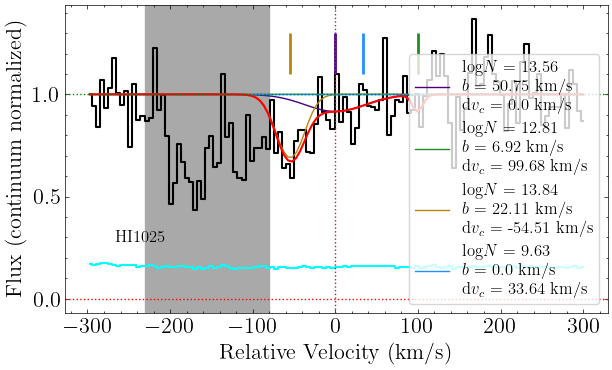

In [130]:
fig, ax = hi_1025_stis.plot_ion_transition_best_fit()

## HI 972

In [131]:
hi_972_stis = ion_transition('HI', 972, 'H', z_sys, 'STIS')

In [132]:
hi_972_stis.grab_ion_transition_info()

In [133]:
hi_972_stis.grab_ion_transition_spec(spec_fits_list, masks=[[-270,-70]])

In [134]:
hi_972_stis.cont_norm_flux(v_abs_range=[-250,250], degree=1)

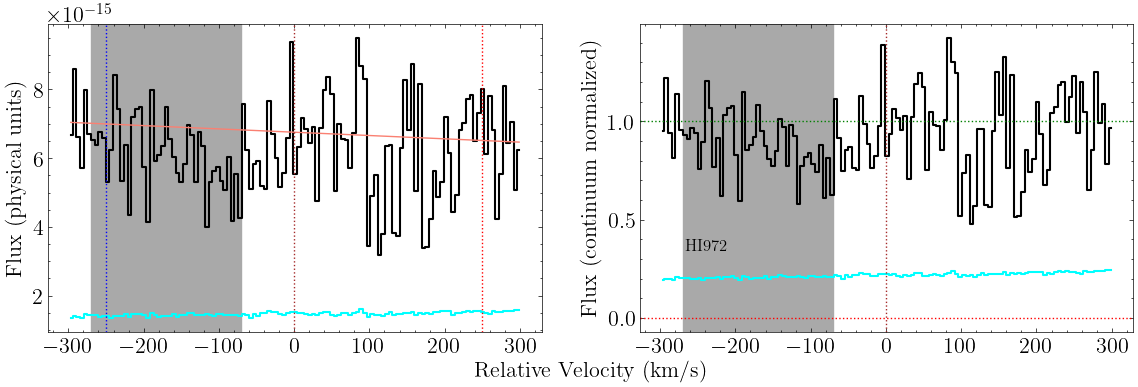

In [135]:
fig, axes = hi_972_stis.plot_ion_transition_spec_cont()

In [136]:
hi_972_stis.grab_ion_transition_lsf(lsf_fits_list)

In [137]:
hi_972_stis.init_ion_transition(init_values = np.array([[12.7, 15, 0],
                                                         [13.7, 20,-80],
                                                         [13.9, 20,-45],
                                                         [12.7, 15, 20]]), 
                             lsf_convolve = True)

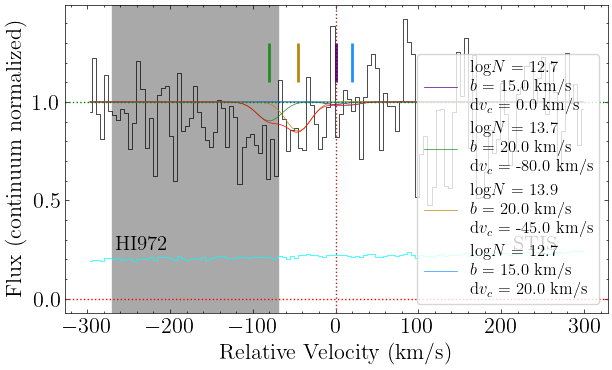

In [138]:
fig, ax = hi_972_stis.plot_ion_transition_init_fit()

In [139]:
hi_972_stis.fit_ion_transition(fix_params_list = ['it1c1_dv_c'])

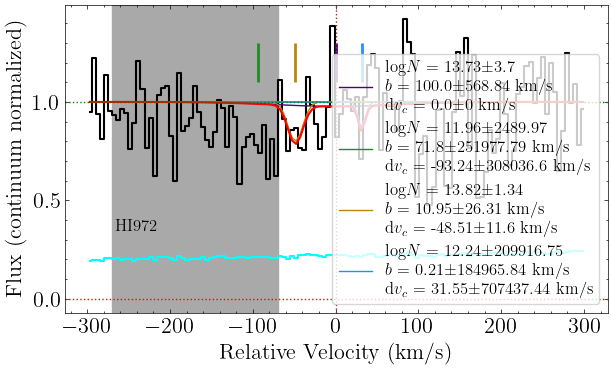

In [140]:
fig, ax = hi_972_stis.plot_ion_transition_best_fit()

## HI ion

In [141]:
hi = ion(z_sys, 'HI', [hi_1215_stis, hi_1025_stis, hi_972_stis])

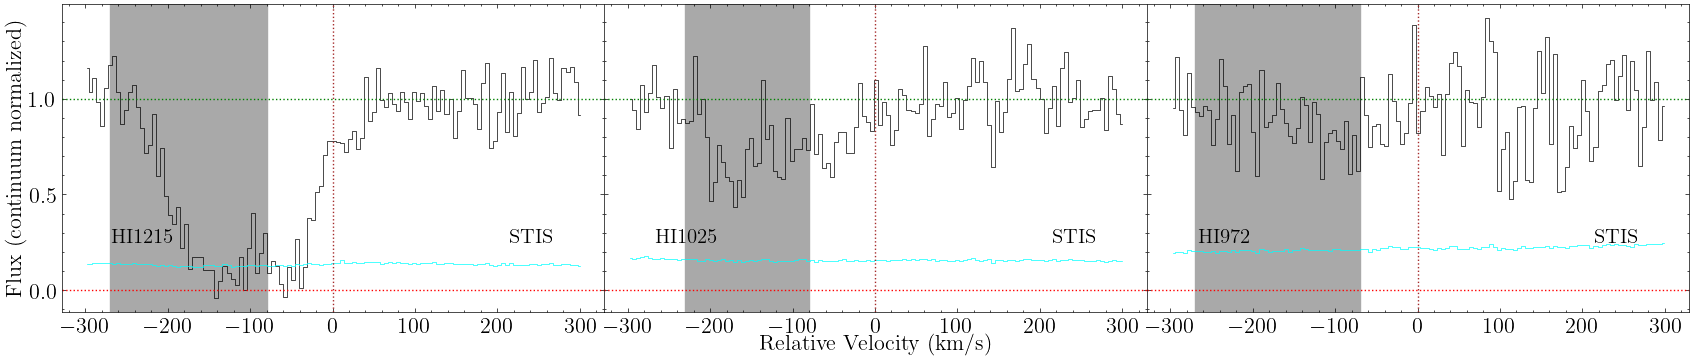

In [142]:
fig, axes = hi.plot_ion(n_cols=3)

In [143]:
hi.init_ion([[[12.8, 20, 0],[13.8, 20, -70],[13.7, 18, -37], [12.7, 18, 30]],
             [[12.8, 20, 0],[13.8, 20, -70],[13.7, 18, -37], [12.7, 18, 30]],
             [[12.8, 20, 0],[13.8, 20, -70],[13.7, 18, -37], [12.7, 18, 30]]])

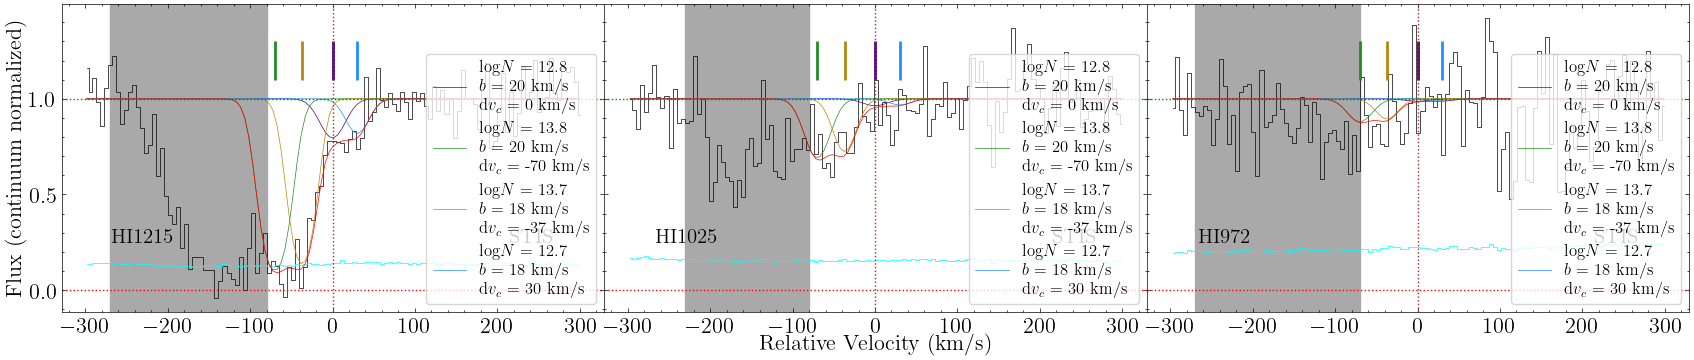

In [144]:
fig, axes = hi.plot_ion_init_fit(n_cols=3)

In [145]:
hi.fit_ion(tie_params_list = [['it1c1_logN', 'it2c1_logN'],
                              ['it1c1_logN', 'it3c1_logN'],
                              ['it1c2_logN', 'it2c2_logN'],
                              ['it1c2_logN', 'it3c2_logN'],
                              ['it1c3_logN', 'it2c3_logN'],
                              ['it1c3_logN', 'it3c3_logN'],
                              ['it1c4_logN', 'it2c4_logN'],
                              ['it1c4_logN', 'it3c4_logN'],
                              ['it1c1_b', 'it2c1_b'],
                              ['it1c1_b', 'it3c1_b'],
                              ['it1c2_b', 'it2c2_b'],
                              ['it1c2_b', 'it3c2_b'],
                              ['it1c3_b', 'it2c3_b'],
                              ['it1c3_b', 'it3c3_b'],
                              ['it1c4_b', 'it2c4_b'],
                              ['it1c4_b', 'it3c4_b'],
                              ['it1c1_b', 'it1c2_b'], #
                              ['it1c3_b', 'it1c4_b'], #
                              ['it1c1_dv_c', 'it2c1_dv_c'],
                              ['it1c1_dv_c', 'it3c1_dv_c'],
                              ['it1c2_dv_c', 'it2c2_dv_c'],
                              ['it1c2_dv_c', 'it3c2_dv_c'],
                              ['it1c3_dv_c', 'it2c3_dv_c'],
                              ['it1c3_dv_c', 'it3c3_dv_c'],
                              ['it1c4_dv_c', 'it2c4_dv_c'],
                              ['it1c4_dv_c', 'it3c4_dv_c'],
                             ],
          fix_params_list = ['it1c1_dv_c'],
          exclude_models = [#'it1c2_dv_c > it1c3_dv_c', # Velocity positions
                            #'it1c3_dv_c > it1c1_dv_c',
          #                  #'it1c1_dv_c > it1c4_dv_c'],
                            'it1c1_b < it1c3_b',
          #                  #'it1c3_b > it1c4_b',
                            'it1c1_logN < it1c4_logN',
                           ],    
          lower_bounds_dict = {'it1c1_b':13, 'it1c3_b':13,
                               'it1c2_dv_c':-80,'it1c3_dv_c':-50,'it1c4_dv_c':15},
          upper_bounds_dict = {'it1c1_b':21,
                              'it1c2_dv_c':-50,'it1c3_dv_c':-15,'it1c4_dv_c':60})

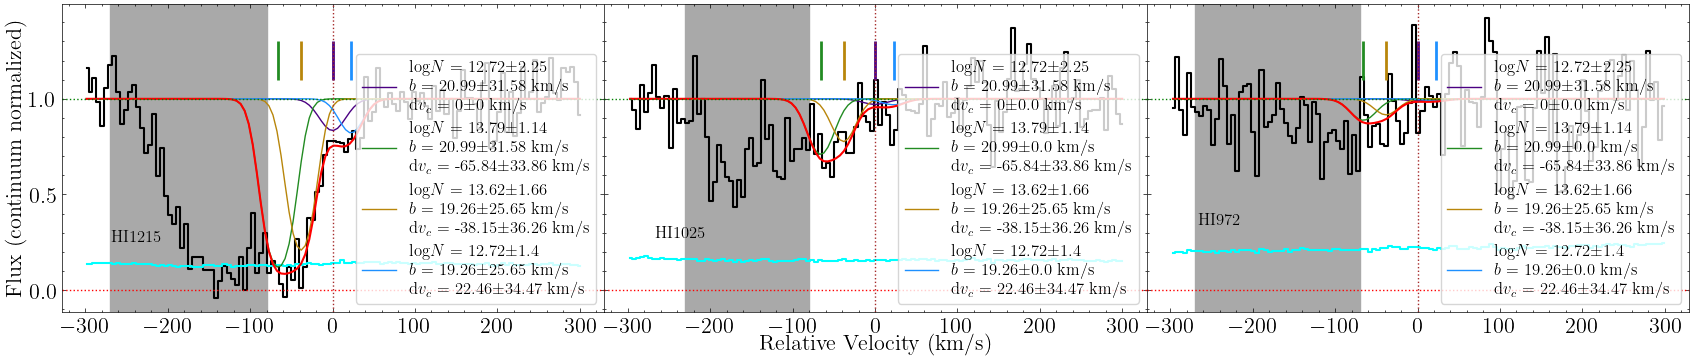

In [146]:
fig, axes = hi.plot_ion_best_fit(n_cols=3)

In [147]:
#hi.fit_ion_emcee(loaddir=rootdir, scale_covar=1e-18, n_walkers=100, n_steps=2500)
#hi.fit_ion_emcee(load=True, loaddir=rootdir)

In [148]:
#fig, axes = hi.plot_samples(n_cols=3)

In [149]:
#hi.plot_corner()

# Presentation plot

Text(0.5, 0, 'v [km s${}^{-1}$]')

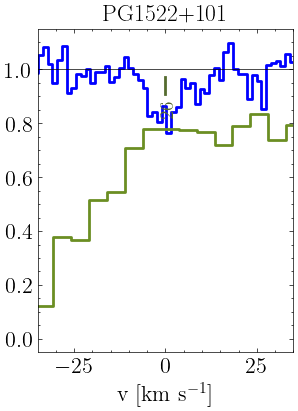

In [150]:
fig, ax = plt.subplots(1, figsize=(3.3,4.2))

ax.step(civ_1550_hires.v, civ_1550_hires.flux_norm, where='mid', color='blue', lw=2)
ax.step(hi_1215_stis.v, hi_1215_stis.flux_norm, where='mid', color='olivedrab', lw=2)

#ax.text(30,0.12,'CIV 1550', color='blue', horizontalalignment='right', fontsize=17)
#ax.text(30,0.02,'SiIII 1206', color='olivedrab', horizontalalignment='right', fontsize=17)

ax.axhline(1, lw=.5)

ax.axvline(0, ymin=0.80, ymax=0.85, color='darkolivegreen', lw=2)
ax.text(0.7, 0.83, '26', rotation=90, fontsize=14, color='darkolivegreen', horizontalalignment='center')
ax.set_xlim(-35,35)
ax.set_ylim(-0.2/4, 1.15)
ax.set_yticks([0.0,0.2,0.4,0.6,0.8,1.0],[0.0,0.2,0.4,0.6,0.8,1.0])

ax.set_title('PG1522+101', fontsize=17)
ax.set_xlabel(r'v [km s${}^{-1}$]')

#plt.savefig('/Users/thepoetoftwilight/Documents/CUBS/Data/PG1522+101/Figures/logT.png', dpi=300)#

# HI + CIII + CIV + OIV

In [151]:
hi_ciii_civ_oiv = ion_suite(z_sys, 'HI+CIII+CIV+OIV', [hi, ciii, civ, oiv])

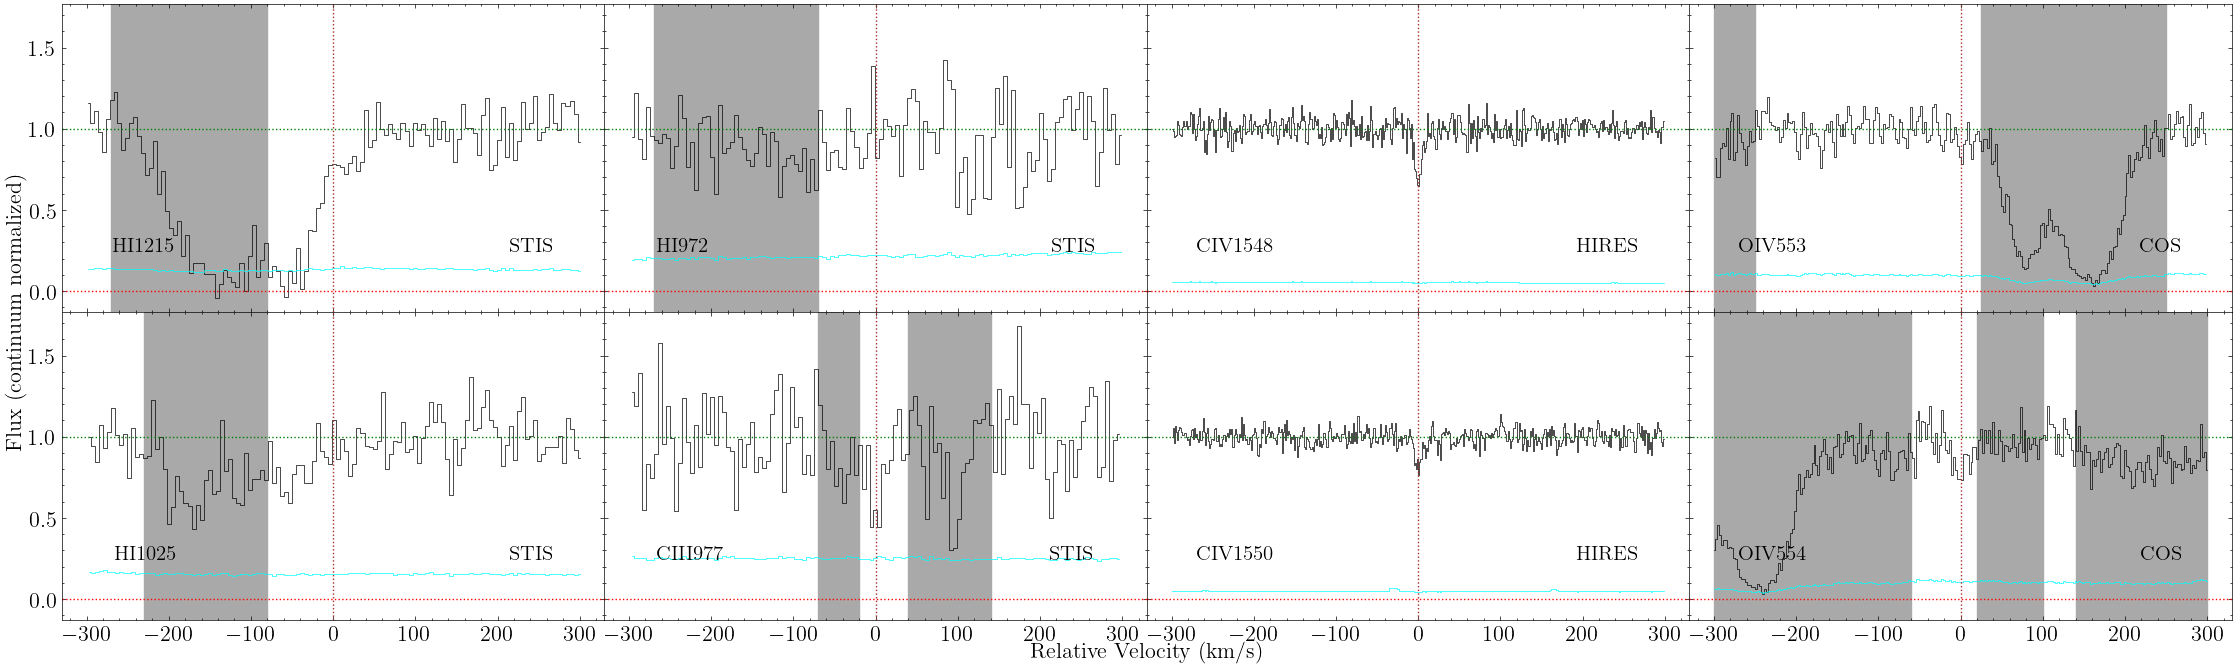

In [152]:
fig, axes = hi_ciii_civ_oiv.plot_ion_suite(n_cols=4)

In [153]:
np.mean(hi_1215_stis.v[1:]-hi_1215_stis.v[:-1])

5.027846157074982

In [154]:
hi_ciii_civ_oiv.init_ion_suite([
                          [[12.8, 20, 0],[13.8, 18, -70],[13.7, 16, -37], [12.5, 14, 30]], # HI
                          [[12.8, 20, 0],[13.8, 18, -70],[13.7, 16, -37], [12.5, 14, 30]],
                          [[12.8, 20, 0],[13.8, 18, -70],[13.7, 16, -37], [12.5, 14, 30]],
                          [[12.85, 6, 0]], # CIII
                          [[12.85, 6, 0]], # CIV
                          [[12.85, 6, 0]],
                          [[13.41, 6, 0]], # OIV
                          [[13.41, 6, 0]]])

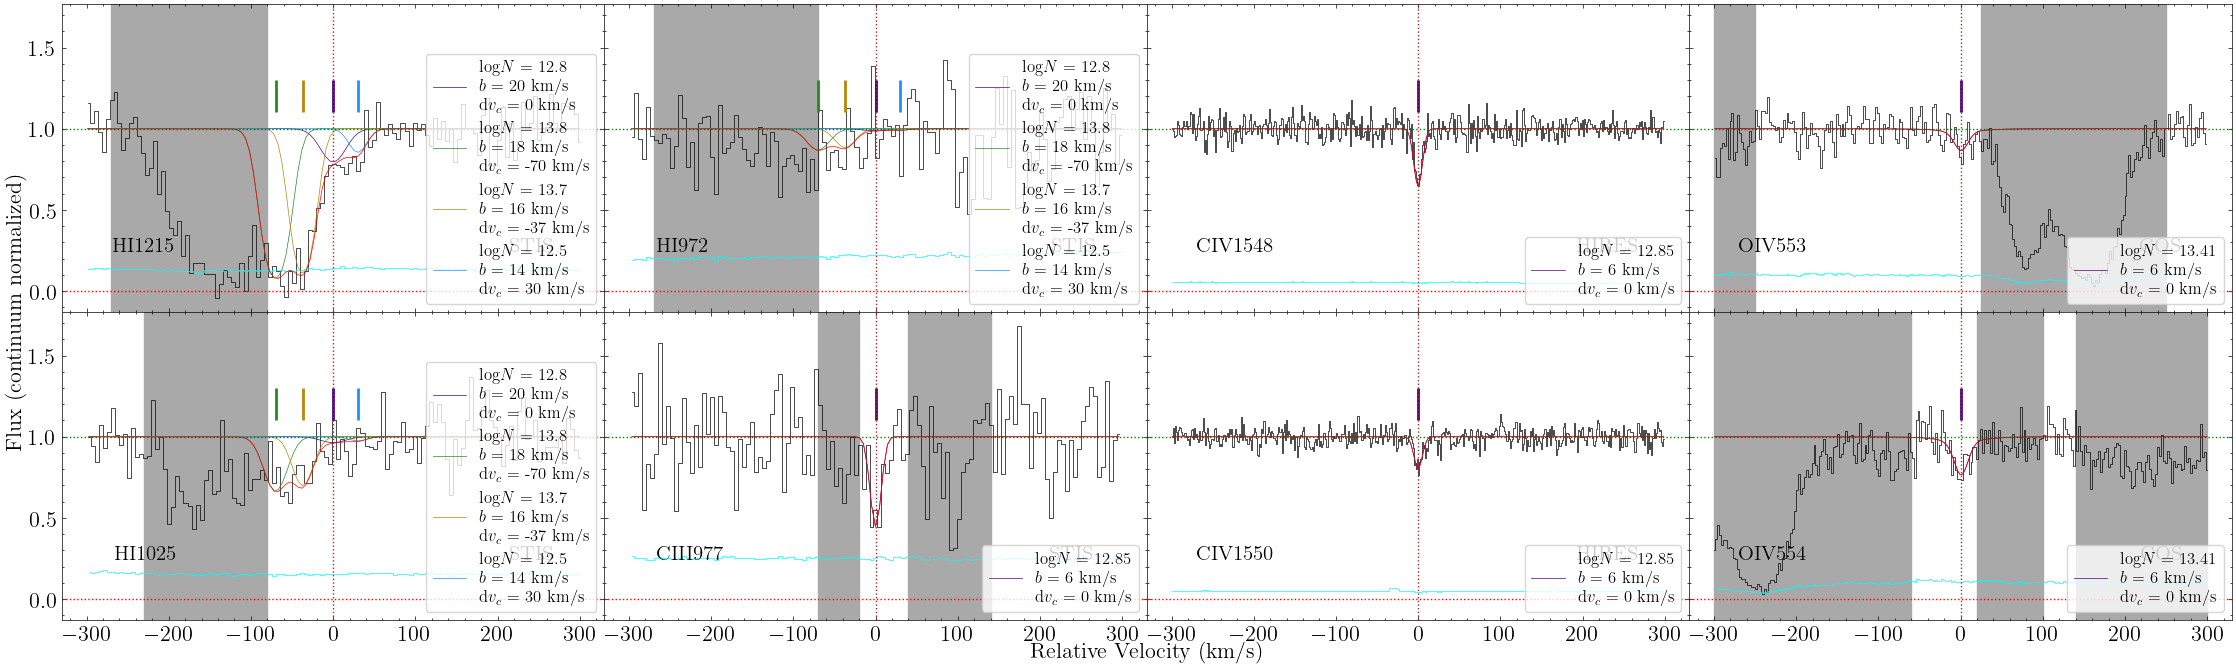

In [155]:
fig, axes = hi_ciii_civ_oiv.plot_ion_suite_init_fit(n_cols=4)

In [156]:
hi_ciii_civ_oiv.fit_ion_suite(tie_params_list=[
    ['it1c1_logN', 'it2c1_logN'], # HI, logN, c1
    ['it1c1_logN', 'it3c1_logN'],
    ['it1c2_logN', 'it2c2_logN'], # HI, logN, c2
    ['it1c2_logN', 'it3c2_logN'],    
    ['it1c3_logN', 'it2c3_logN'], # HI, logN, c3
    ['it1c3_logN', 'it3c3_logN'],   
    ['it1c4_logN', 'it2c4_logN'], # HI, logN, c4
    ['it1c4_logN', 'it3c4_logN'],    
    ['it1c1_b', 'it2c1_b'], # HI, b, c1
    ['it1c1_b', 'it3c1_b'],
    ['it1c2_b', 'it2c2_b'], # HI, b, c2
    ['it1c2_b', 'it3c2_b'],    
    ['it1c3_b', 'it2c3_b'], # HI, b, c3
    ['it1c3_b', 'it3c3_b'],   
    ['it1c4_b', 'it2c4_b'], # HI, b, c4
    ['it1c4_b', 'it3c4_b'],  
    ['it4c1_b', 'it5c1_b'], # CIII, CIV, OIV, b
    ['it4c1_b', 'it6c1_b'],
    ['it4c1_b', 'it7c1_b'],
    ['it4c1_b', 'it8c1_b'],
    ['it5c1_logN', 'it6c1_logN'], # CIII, logN
    ['it7c1_logN', 'it8c1_logN'], # OIV, logN
    ['it1c1_dv_c', 'it2c1_dv_c'], # HI, CIII, CIV, OIV, c1 dv_c
    ['it1c1_dv_c', 'it3c1_dv_c'],
    ['it1c1_dv_c', 'it4c1_dv_c'],
    ['it1c1_dv_c', 'it5c1_dv_c'],
    ['it1c1_dv_c', 'it6c1_dv_c'],
    ['it1c1_dv_c', 'it7c1_dv_c'],
    ['it1c1_dv_c', 'it8c1_dv_c'],
    ['it1c2_dv_c', 'it2c2_dv_c'], # HI dv_c, c2
    ['it1c2_dv_c', 'it3c2_dv_c'],
    ['it1c3_dv_c', 'it2c3_dv_c'], # HI dv_c, c3
    ['it1c3_dv_c', 'it3c3_dv_c'],
    ['it1c4_dv_c', 'it2c4_dv_c'], # HI dv_c, c4
    ['it1c4_dv_c', 'it3c4_dv_c'],
],
        exclude_models = [
                          'it1c1_b > it4c1_b 3.46', # Thermal limit on HI width
                          'it1c1_b < it1c2_b', # Make HI, c2 narrower than c1
                          'it1c2_b < it1c3_b', # HI c3 even narrower so can be moved redward
                          'it1c3_b < it1c4_b', # HI c4 narrower so can be moved redward
                          'it1c1_logN < it1c4_logN', # HI c1 stronger than HI c4
                          'it1c1_b < it1c4_b',
                         ], 
          lower_bounds_dict = {'it1c1_b':12.8, 'it1c2_b':12.8, 'it1c3_b':12.8, 'it1c4_b':6, # c4 may be narrow, FWHM = dv_pix 
                              'it1c2_dv_c':-80,'it1c3_dv_c':-50,'it1c4_dv_c':15}, # HI v_c, c2, c3, c4
          upper_bounds_dict = {'it1c2_dv_c':-50,'it1c3_dv_c':-15,'it1c4_dv_c':60})

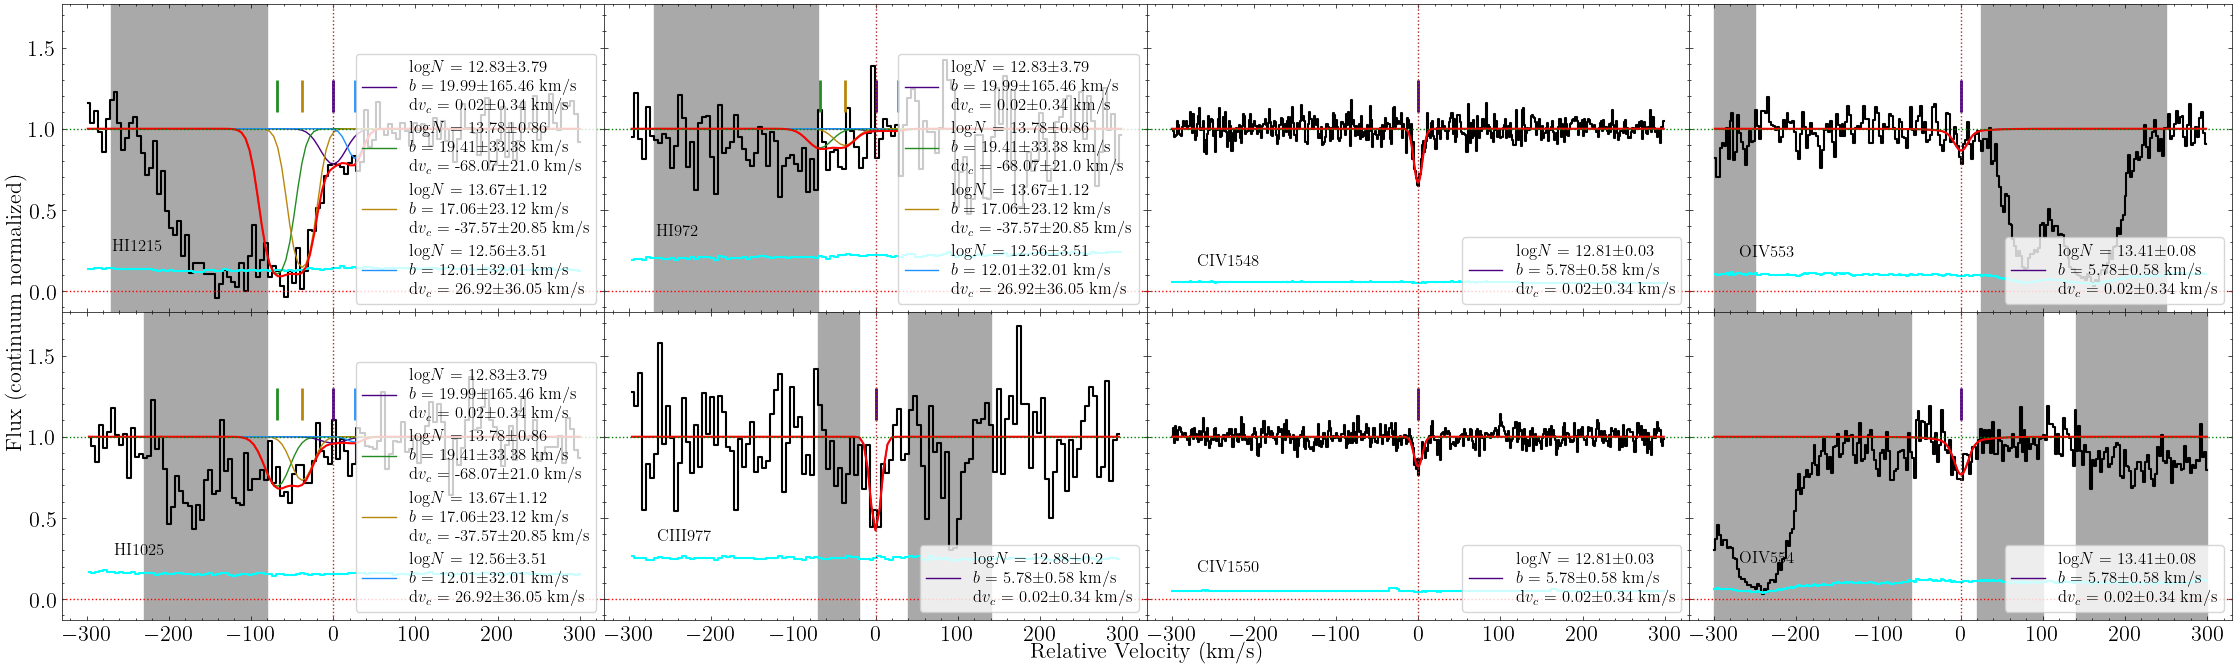

In [157]:
fig, axes = hi_ciii_civ_oiv.plot_ion_suite_best_fit(n_cols=4)

In [158]:
len(hi_ciii_civ_oiv.result.var_names)

16

In [159]:
hi_ciii_civ_oiv.fit_ion_suite_emcee(loaddir=rootdir, n_walkers=200, scale_covar=1e-18, n_steps=5000)
#hi_ciii_civ_oiv.fit_ion_suite_emcee(load=True, loaddir=rootdir)

100%|███████████████████████████████████████| 5000/5000 [49:57<00:00,  1.67it/s]


The chain is shorter than 50 times the integrated autocorrelation time for 16 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 100;
tau: [288.52682765 267.28358809 266.18615304 294.2932692  269.39292096
 311.78135324 301.17490643 274.25515999 291.7171315  275.58613721
 280.9717224  269.50569887 251.058641   262.5679827  294.9875647
 253.02402777]


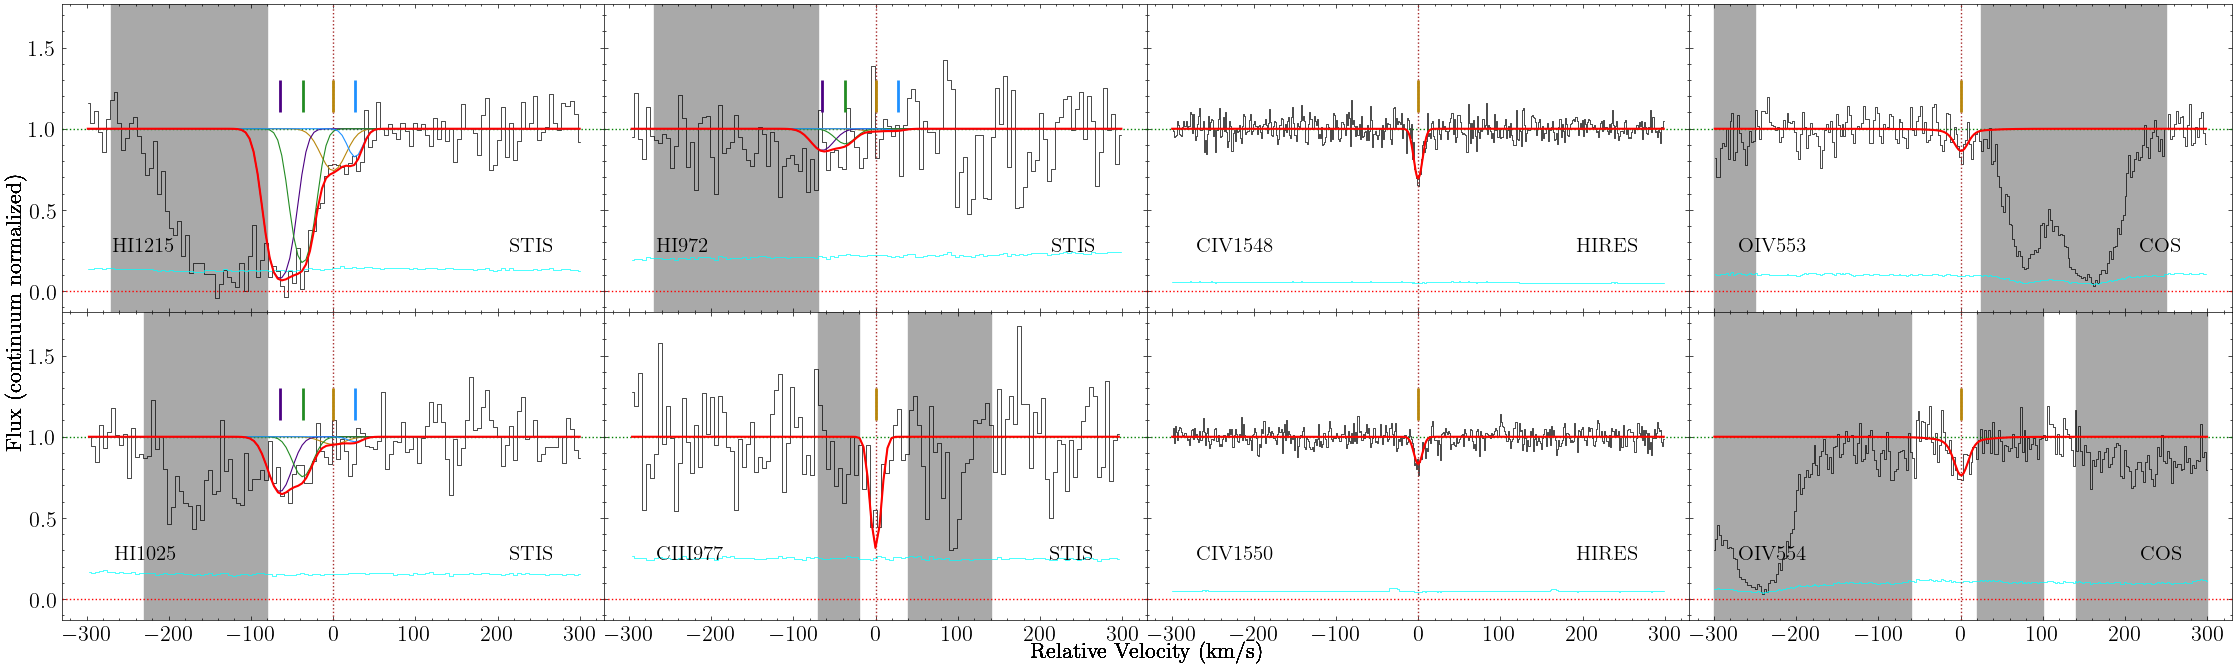

In [160]:
fig, axes = hi_ciii_civ_oiv.plot_samples(n_cols=4)

In [167]:
#hi_ciii_civ_oiv.plot_corner()

In [162]:
np.percentile(hi_ciii_civ_oiv.result_emcee.flatchain['it1c3_logN'], 100*cdf_1sig)-np.median(hi_ciii_civ_oiv.result_emcee.flatchain['it1c3_logN'])

0.15706998823801044

In [163]:
np.median(hi_ciii_civ_oiv.result_emcee.flatchain['it4c1_b'])

6.01583722305406

# Summary List
Now compile a summary list

In [190]:
summary = ion_summary([hi_ciii_civ_oiv])

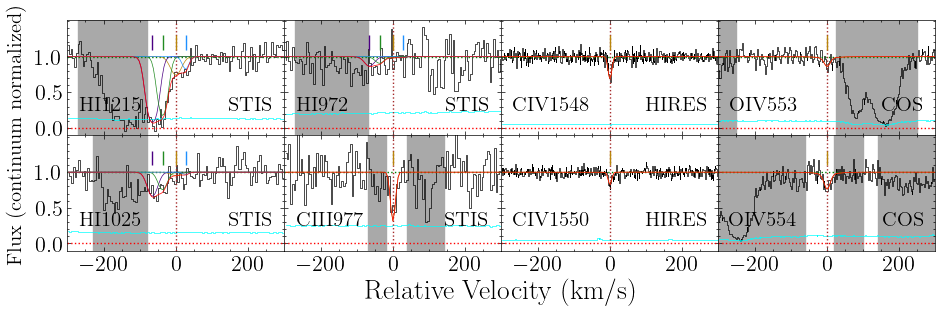

In [191]:
fig, axes = plt.subplots(2, 4, figsize=(4*2.8, 2*1.5), sharex=True, sharey=True)

summary.plot_samples(fig=fig, axes=axes, n_cols=4, label_axes=False)

axes[0,0].set_ylim(-0.1,1.52)
axes[0,0].set_xlim(-299.9,299.9)
axes[0,0].set_yticks([0,0.5,1])

ax_label = fig.add_subplot(111, frameon=False)
ax_label.set_xticks([])
ax_label.set_yticks([])

ax_label.set_xlabel('Relative Velocity (km/s)', labelpad=20, fontsize=20)
ax_label.set_ylabel('Flux (continuum normalized)', labelpad=30, fontsize=15)

plt.savefig(rootdir+'Ions/z={}/z={}_vp_alt.pdf'.format(str(z_sys), str(z_sys).replace('.', '_')), dpi=300)
plt.savefig(rootdir+'Ions/z={}/z={}_vp_alt.png'.format(str(z_sys), str(z_sys).replace('.', '_')), dpi=300)

In [192]:
summary.print_summary()

HI1215
dv_c = 0.0 \pm 0.4, logN = 12.91 \pm 0.14, b = 19.6_{-2.2}^{+2.4}
dv_c = -64.9_{-5.6}^{+4.1}, logN = 13.81 \pm 0.11, b = 18.2_{-2.1}^{+2.4}
dv_c = -36.9_{-4.9}^{+4.4}, logN = 13.60 \pm 0.17, b = 16.1_{-2.0}^{+2.5}
dv_c = 26.6_{-6.1}^{+7.0}, logN = 12.51_{-0.31}^{+0.18}, b = 11.3 \pm 3.4
HI1025
dv_c = 0.0 \pm 0.4, logN = 12.91 \pm 0.14, b = 19.6_{-2.2}^{+2.4}
dv_c = -64.9_{-5.6}^{+4.1}, logN = 13.81 \pm 0.11, b = 18.2_{-2.1}^{+2.4}
dv_c = -36.9_{-4.9}^{+4.4}, logN = 13.60 \pm 0.17, b = 16.1_{-2.0}^{+2.5}
dv_c = 26.6_{-6.1}^{+7.0}, logN = 12.51_{-0.31}^{+0.18}, b = 11.3 \pm 3.4
HI972
dv_c = 0.0 \pm 0.4, logN = 12.91 \pm 0.14, b = 19.6_{-2.2}^{+2.4}
dv_c = -64.9_{-5.6}^{+4.1}, logN = 13.81 \pm 0.11, b = 18.2_{-2.1}^{+2.4}
dv_c = -36.9_{-4.9}^{+4.4}, logN = 13.60 \pm 0.17, b = 16.1_{-2.0}^{+2.5}
dv_c = 26.6_{-6.1}^{+7.0}, logN = 12.51_{-0.31}^{+0.18}, b = 11.3 \pm 3.4
CIII977
dv_c = 0.0 \pm 0.4, logN = 13.03 \pm 0.28, b = 6.0 \pm 0.7
CIV1548
dv_c = 0.0 \pm 0.4, logN = 12.78 \pm 0.03

# HeI

## HeI 584

In [165]:
hei_584_fuv = ion_transition('HeI', 584, 'He', z_sys, 'COS FUV')

In [166]:
hei_584_fuv.grab_ion_transition_info()

In [167]:
hei_584_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-200],[-150,-30]])

In [168]:
hei_584_fuv.cont_norm_flux(v_abs_range=[-150,50], degree=1)

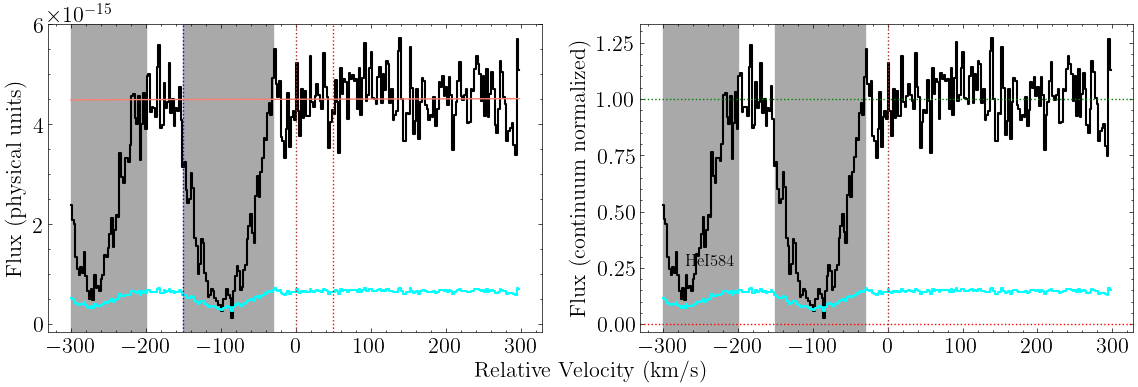

In [169]:
fig, ax = hei_584_fuv.plot_ion_transition_spec_cont()

In [170]:
hei_584_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [171]:
hei_584_fuv.get_upper_lim(20)

logN-1sig: 12.7
logN-2sig: 13.0
logN-3sig: 13.1


In [182]:
hei_584_fuv.get_upper_lim_data(20,0,-30,40)

logN-1sig: 13.1
logN-2sig: 13.2
logN-3sig: 13.3


## HeI 537

In [173]:
hei_537_fuv = ion_transition('HeI', 537, 'He', z_sys, 'COS FUV')

In [174]:
hei_537_fuv.grab_ion_transition_info()

In [175]:
hei_537_fuv.grab_ion_transition_spec(spec_fits_list, v_range=[-270,270],masks=[[-200,-40]])

In [176]:
hei_537_fuv.cont_norm_flux(v_abs_range=[-200,220], degree=1)

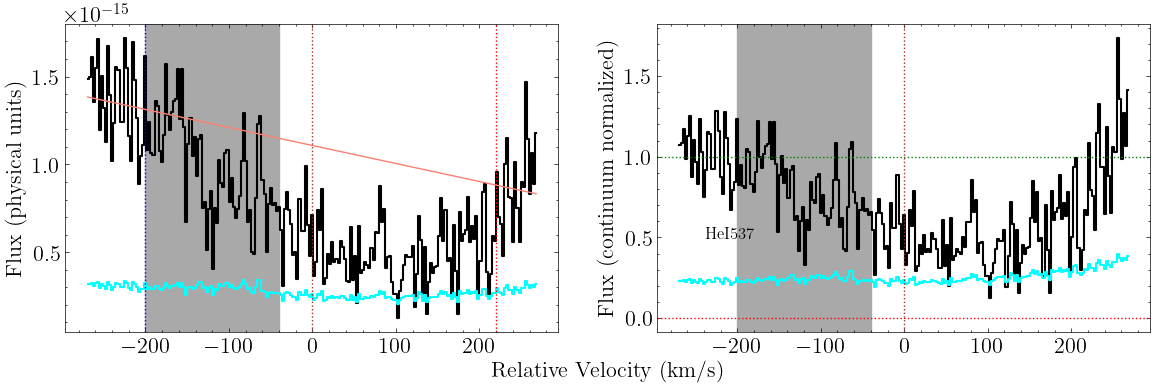

In [177]:
fig, ax = hei_537_fuv.plot_ion_transition_spec_cont()

In [178]:
hei_537_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [179]:
hei_537_fuv.get_upper_lim(20)

logN-1sig: 13.6
logN-2sig: 13.8
logN-3sig: 14.0


# CII

## CII 903.9 (NUV)

In [221]:
cii_904_nuv = ion_transition('CII', 903.9, 'C', z_sys, 'COS NUV')

In [222]:
cii_904_nuv.grab_ion_transition_info()

In [223]:
cii_904_nuv.grab_ion_transition_spec(spec_fits_list)

In [224]:
cii_904_nuv.cont_norm_flux(v_abs_range=[-80,120], degree=1)

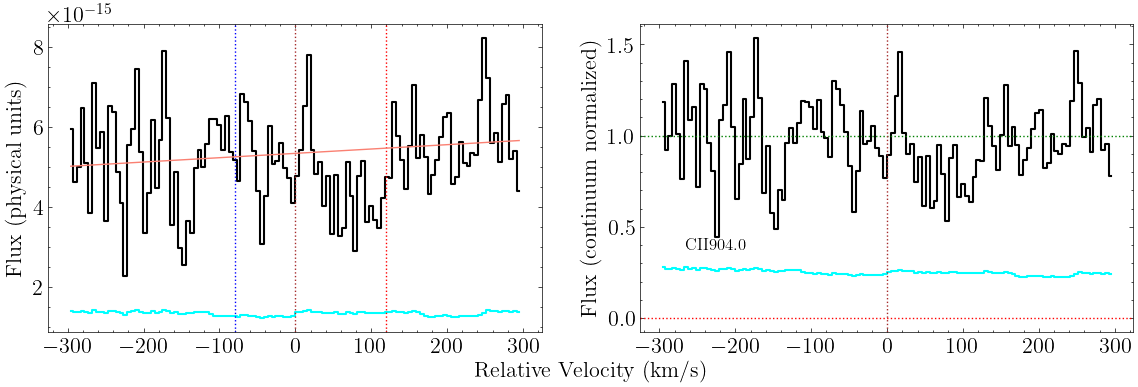

In [225]:
fig, ax = cii_904_nuv.plot_ion_transition_spec_cont()

In [226]:
cii_904_nuv.grab_ion_transition_lsf(lsf_fits_list)

In [227]:
cii_904_nuv.get_upper_lim(6)

logN-1sig: 13.0
logN-2sig: 13.3
logN-3sig: 13.6


## CII 903.6 (NUV)

In [228]:
cii_903_nuv = ion_transition('CII', 903.6, 'C', z_sys, 'COS NUV')

In [229]:
cii_903_nuv.grab_ion_transition_info()

In [230]:
cii_903_nuv.grab_ion_transition_spec(spec_fits_list)

In [231]:
cii_903_nuv.cont_norm_flux(v_abs_range=[-60,80], degree=1)

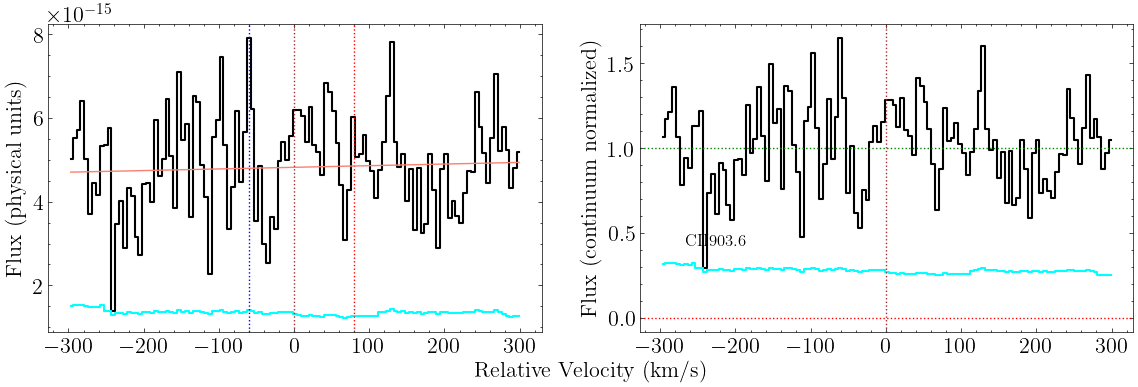

In [232]:
fig, ax = cii_903_nuv.plot_ion_transition_spec_cont()

In [233]:
cii_903_nuv.grab_ion_transition_lsf(lsf_fits_list)

In [234]:
cii_903_nuv.get_upper_lim(6)

logN-1sig: 13.4
logN-2sig: 13.7
logN-3sig: 14.0


## CII 1036 (STIS)

In [235]:
cii_1036_stis = ion_transition('CII', 1036, 'C', z_sys, 'STIS')

In [236]:
cii_1036_stis.grab_ion_transition_info()

In [237]:
cii_1036_stis.grab_ion_transition_spec(spec_fits_list, masks=[[200,300]])

In [238]:
cii_1036_stis.cont_norm_flux(v_abs_range=[-80,80], degree=1)

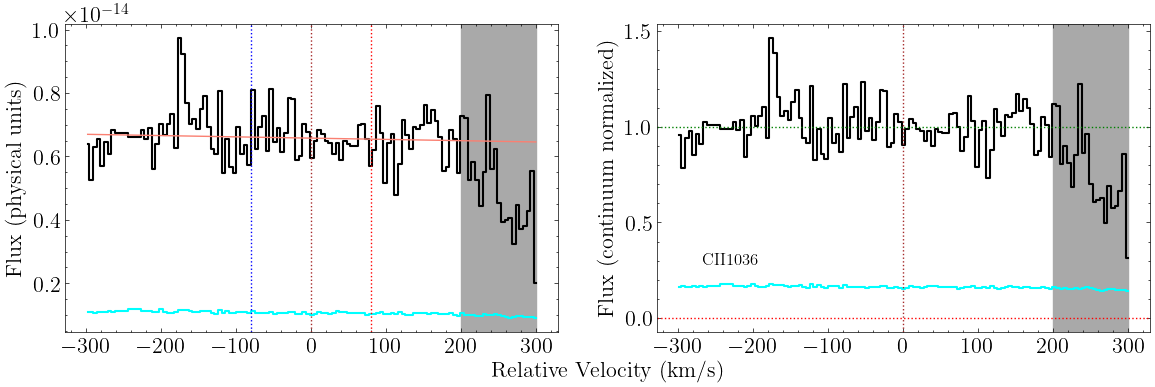

In [239]:
fig, ax = cii_1036_stis.plot_ion_transition_spec_cont()

In [240]:
cii_1036_stis.grab_ion_transition_lsf(lsf_fits_list)

In [241]:
cii_1036_stis.get_upper_lim(6)

logN-1sig: 12.8
logN-2sig: 13.1
logN-3sig: 13.3


# NII

## NII 1083 (STIS)

In [242]:
nii_1083_stis = ion_transition('NII', 1083, 'N', z_sys, 'STIS')

In [243]:
nii_1083_stis.grab_ion_transition_info()

In [244]:
nii_1083_stis.grab_ion_transition_spec(spec_fits_list)

In [245]:
nii_1083_stis.cont_norm_flux(v_abs_range=[-80,80], degree=1)

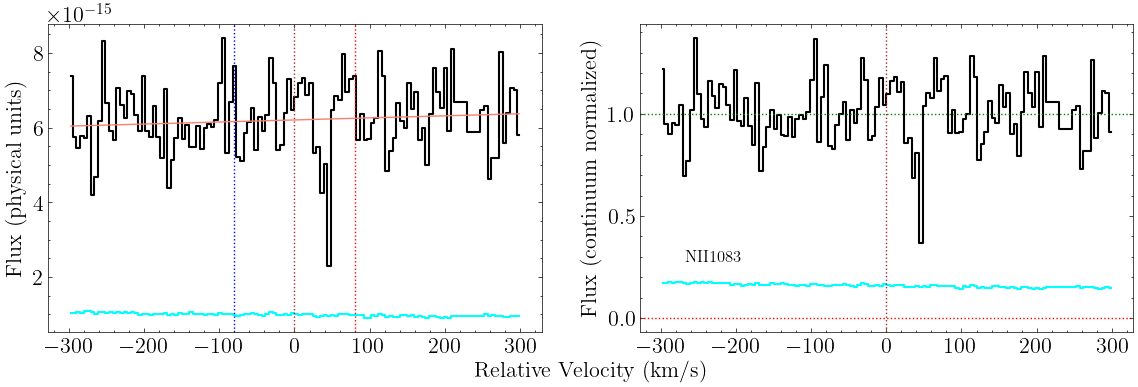

In [246]:
fig, ax = nii_1083_stis.plot_ion_transition_spec_cont()

In [247]:
nii_1083_stis.grab_ion_transition_lsf(lsf_fits_list)

In [250]:
nii_1083_stis.get_upper_lim(6)

logN-1sig: 12.9
logN-2sig: 13.1
logN-3sig: 13.3


In [251]:
nii_1083_stis.get_upper_lim_data(6,0,-20,20)

logN-1sig: 12.6
logN-2sig: 12.9
logN-3sig: 13.1


# NIII

## NIII 989 (STIS)

In [252]:
niii_989_stis = ion_transition('NIII', 989, 'N', z_sys, 'STIS')

In [253]:
niii_989_stis.grab_ion_transition_info()

In [254]:
niii_989_stis.grab_ion_transition_spec(spec_fits_list)

In [255]:
niii_989_stis.cont_norm_flux(v_abs_range=[-240,80], degree=1)

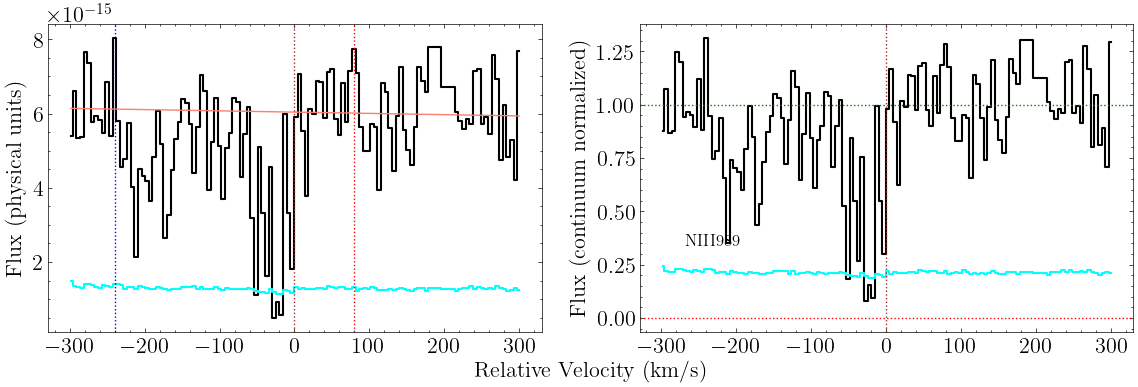

In [256]:
fig, ax = niii_989_stis.plot_ion_transition_spec_cont()

In [257]:
niii_989_stis.grab_ion_transition_lsf(lsf_fits_list)

In [258]:
niii_989_stis.get_upper_lim(6)

logN-1sig: 13.0
logN-2sig: 13.2
logN-3sig: 13.4


## NIII 685 (FUV)

In [259]:
niii_685_fuv = ion_transition('NIII', 686, 'N', z_sys, 'COS FUV')

In [260]:
niii_685_fuv.grab_ion_transition_info()

In [261]:
niii_685_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-100],[260,300]])

In [262]:
niii_685_fuv.cont_norm_flux(v_abs_range=[-30,30], degree=1)

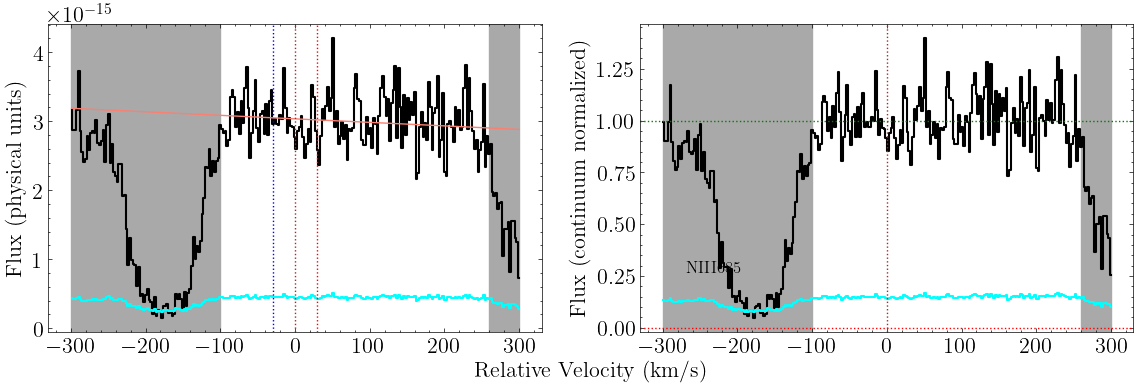

In [263]:
fig, ax = niii_685_fuv.plot_ion_transition_spec_cont()

In [264]:
niii_685_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [265]:
niii_685_fuv.get_upper_lim(6)

logN-1sig: 12.6
logN-2sig: 12.9
logN-3sig: 13.0


In [266]:
niii_685_fuv.get_upper_lim_data(6,0)

logN-1sig: 12.9
logN-2sig: 13.1
logN-3sig: 13.2


## NIII 684 (FUV)

In [267]:
niii_684_fuv = ion_transition('NIII', 684, 'N', z_sys, 'COS FUV')

In [268]:
niii_684_fuv.grab_ion_transition_info()

In [269]:
niii_684_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-80],[-20,120]])

In [270]:
niii_684_fuv.cont_norm_flux(v_abs_range=[-30,30], degree=1)

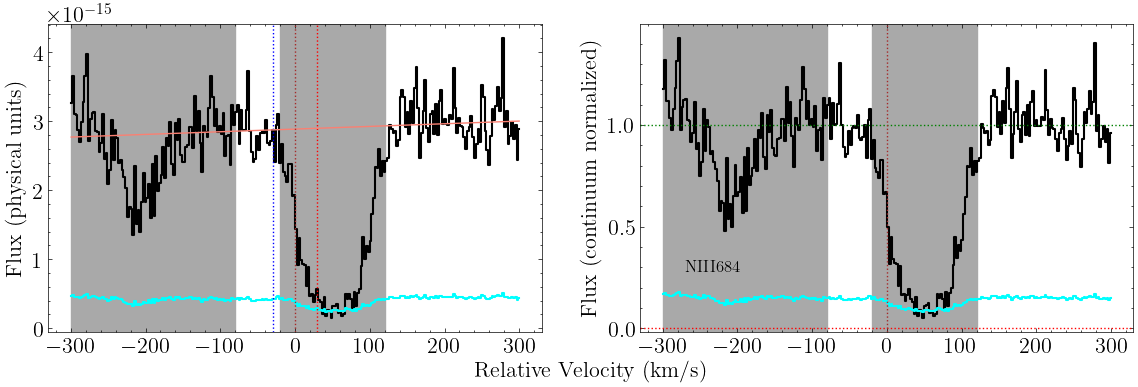

In [271]:
fig, ax = niii_684_fuv.plot_ion_transition_spec_cont()

In [272]:
niii_684_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [273]:
niii_684_fuv.get_upper_lim(6)

logN-1sig: 12.9
logN-2sig: 13.1
logN-3sig: 13.3


# NIV

## NIV 765
Get NIV 765 from COS FUV

In [274]:
niv_765_fuv = ion_transition('NIV', 765, 'N', z_sys, 'COS FUV')

In [275]:
niv_765_fuv.grab_ion_transition_info()

In [276]:
niv_765_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-240,-90],[-30,120]])

In [277]:
niv_765_fuv.cont_norm_flux(v_abs_range=[-40,120], degree=1)

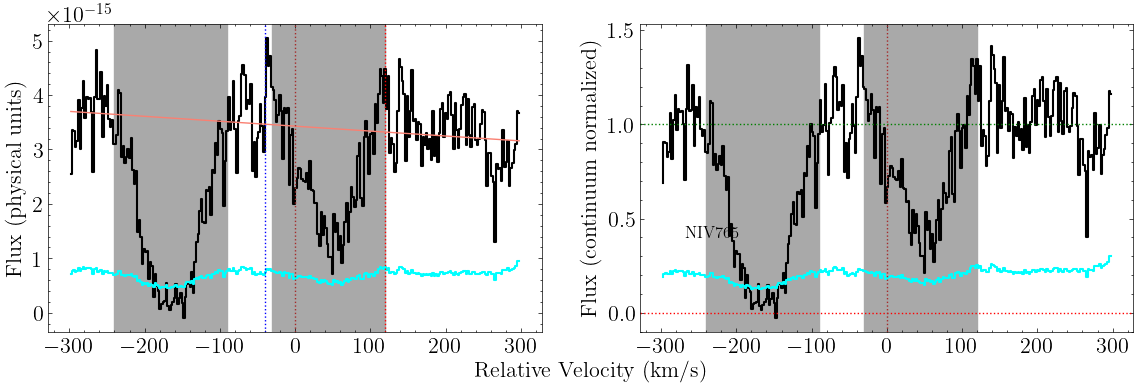

In [278]:
fig, ax = niv_765_fuv.plot_ion_transition_spec_cont()

In [279]:
niv_765_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [280]:
niv_765_fuv.get_upper_lim(6)

logN-1sig: 12.3
logN-2sig: 12.6
logN-3sig: 12.7


In [281]:
x,_,y,_ = niv_765_fuv.get_upper_lim_data(6,0,-50,50,return_grids=True)

logN-1sig: 13.1
logN-2sig: 13.3
logN-3sig: 13.4


# OII

## OII 834 (NUV)

In [282]:
oii_834_nuv = ion_transition('OII', 834, 'O', z_sys, 'COS NUV')

In [283]:
oii_834_nuv.grab_ion_transition_info()

In [284]:
oii_834_nuv.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-130]])

In [285]:
oii_834_nuv.cont_norm_flux(renorm=True, v_abs_range=[-30,30], degree=1)

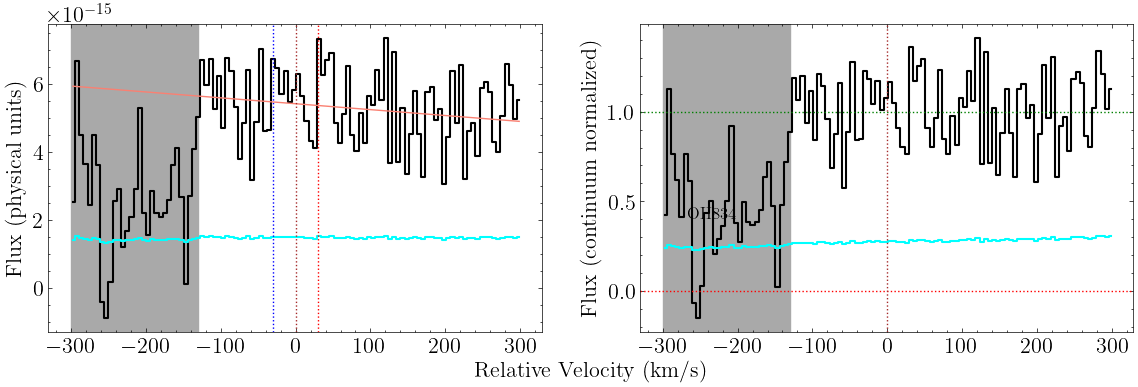

In [286]:
fig, axes = oii_834_nuv.plot_ion_transition_spec_cont()

In [287]:
oii_834_nuv.grab_ion_transition_lsf(lsf_fits_list)

In [288]:
oii_834_nuv.get_upper_lim(6,logN_max=20)

logN-1sig: 13.6
logN-2sig: 14.0
logN-3sig: 14.8


In [289]:
oii_834_nuv.get_upper_lim_data(6,0,logN_max=20)

logN-1sig: 13.4
logN-2sig: 13.8
logN-3sig: 14.2


# OIII

## OIII 702

In [290]:
oiii_702_fuv = ion_transition('OIII', 702, 'O', z_sys, 'COS FUV')

In [291]:
oiii_702_fuv.grab_ion_transition_info()

In [292]:
oiii_702_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-280,-140],[40,160]])

In [293]:
oiii_702_fuv.cont_norm_flux(v_abs_range=[-50,65], degree=1)

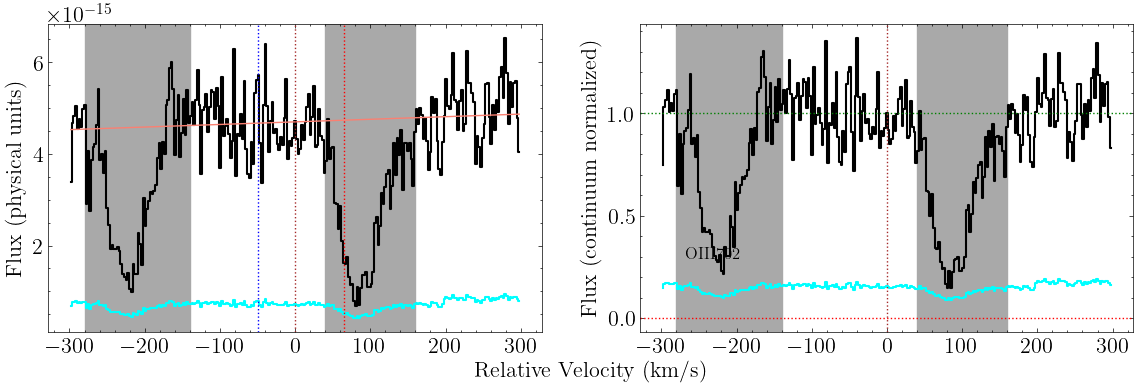

In [294]:
fig, ax = oiii_702_fuv.plot_ion_transition_spec_cont()

In [295]:
oiii_702_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [296]:
oiii_702_fuv.get_upper_lim(6)

logN-1sig: 12.9
logN-2sig: 13.1
logN-3sig: 13.3


In [297]:
oiii_702_fuv.get_upper_lim_data(6,0,-30,30)

logN-1sig: 13.2
logN-2sig: 13.4
logN-3sig: 13.5


## OIII 832

In [168]:
oiii_832_fuv = ion_transition('OIII', 832, 'O', z_sys, 'COS NUV')

In [169]:
oiii_832_fuv.grab_ion_transition_info()

In [170]:
oiii_832_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-280,-140],[40,160],[280,300]])

In [171]:
oiii_832_fuv.cont_norm_flux(v_abs_range=[-50,65], degree=1)

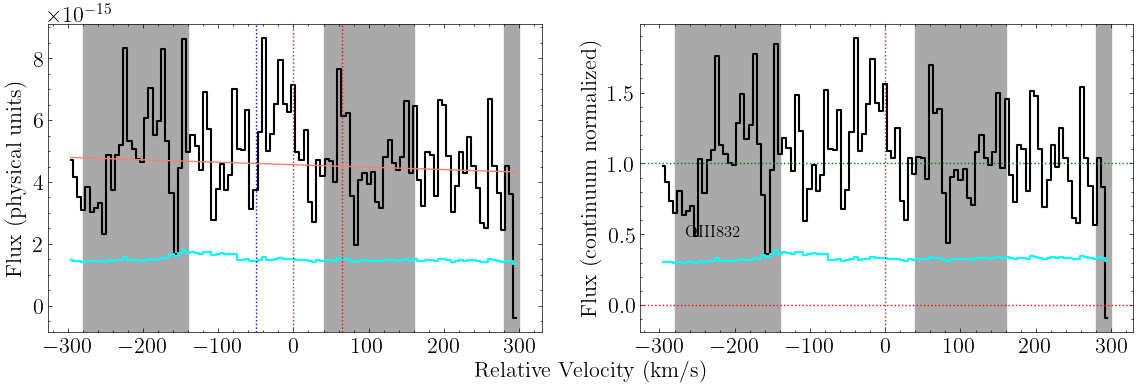

In [172]:
fig, ax = oiii_832_fuv.plot_ion_transition_spec_cont()

In [173]:
oiii_832_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [174]:
oiii_832_fuv.get_upper_lim(6)

logN-1sig: 13.7
logN-2sig: 14.0
logN-3sig: 14.0


In [175]:
oiii_832_fuv.get_upper_lim_data(6,0,-30,30)

logN-1sig: 13.3
logN-2sig: 13.6
logN-3sig: 13.9


# OV

## OV 629

In [306]:
ov_629_fuv = ion_transition('OV', 629, 'O', z_sys, 'COS FUV')

In [307]:
ov_629_fuv.grab_ion_transition_info()

In [308]:
ov_629_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-200], [50,150], [200,300]])

In [309]:
ov_629_fuv.cont_norm_flux(v_abs_range=[-70,50], degree=1)

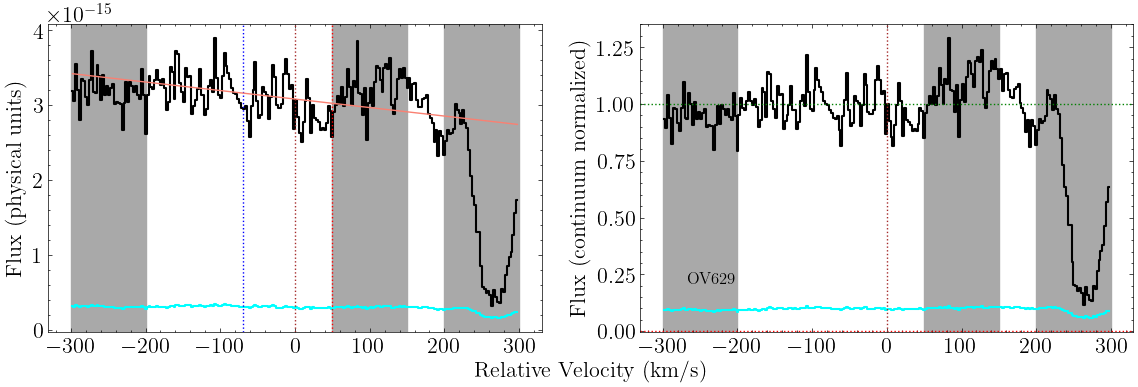

In [310]:
fig, ax = ov_629_fuv.plot_ion_transition_spec_cont()

In [311]:
ov_629_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [245]:
ov_629_fuv.get_upper_lim(20)

logN-1sig: 12.3
logN-2sig: 12.5
logN-3sig: 12.7


In [248]:
ov_629_fuv.get_upper_lim_data(20,0,logN_max=20)

logN-1sig: 12.6
logN-2sig: 12.7
logN-3sig: 12.8


# OVI

## OVI 1031

In [249]:
ovi_1031_stis = ion_transition('OVI', 1031, 'O', z_sys, 'STIS')

In [250]:
ovi_1031_stis.grab_ion_transition_info()

In [251]:
ovi_1031_stis.grab_ion_transition_spec(spec_fits_list)

In [252]:
ovi_1031_stis.cont_norm_flux(v_abs_range=[-70,50], degree=1)

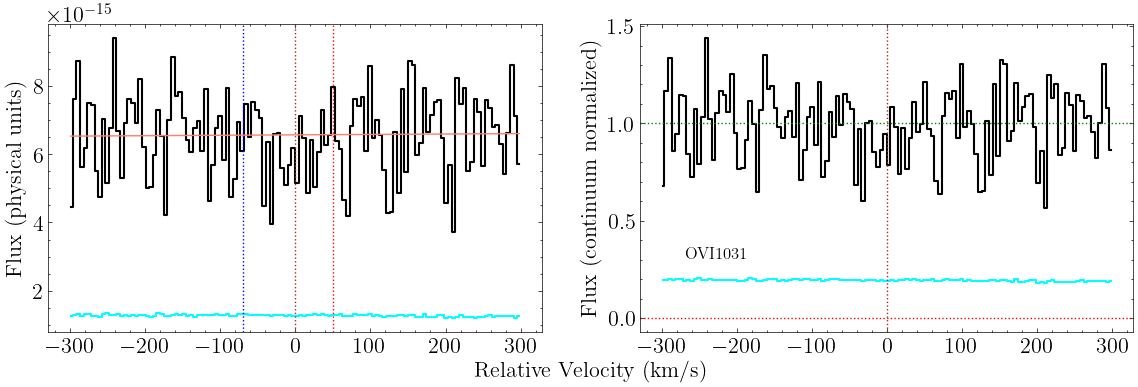

In [253]:
fig, ax = ovi_1031_stis.plot_ion_transition_spec_cont()

In [254]:
ovi_1031_stis.grab_ion_transition_lsf(lsf_fits_list)

In [255]:
ovi_1031_stis.get_upper_lim(20)

logN-1sig: 13.1
logN-2sig: 13.3
logN-3sig: 13.5


In [260]:
ovi_1031_stis.get_upper_lim_data(20,0,-50,50)

logN-1sig: 13.4
logN-2sig: 13.6
logN-3sig: 13.7


## OVI 1031

In [256]:
ovi_1037_stis = ion_transition('OVI', 1037, 'O', z_sys, 'STIS')

In [257]:
ovi_1037_stis.grab_ion_transition_info()

In [258]:
ovi_1037_stis.grab_ion_transition_spec(spec_fits_list)

In [511]:
ovi_1037_stis.cont_norm_flux(v_abs_range=[-200,50], degree=1)

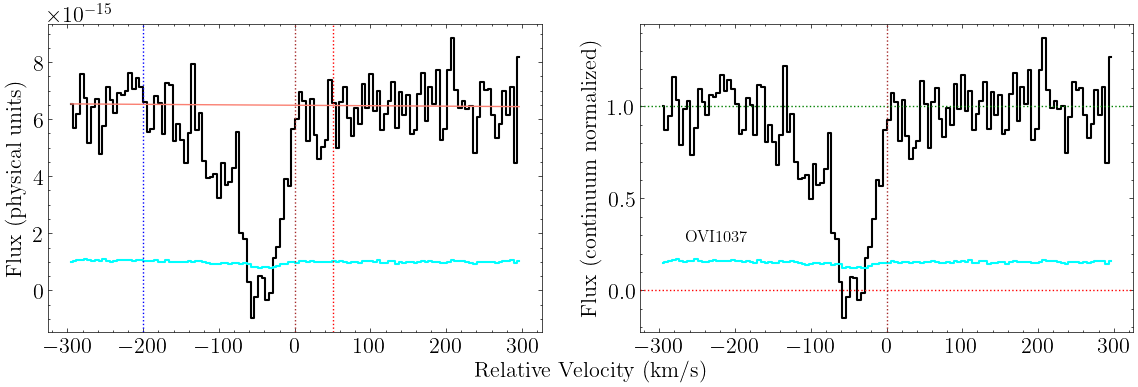

In [512]:
fig, ax = ovi_1037_stis.plot_ion_transition_spec_cont()

In [513]:
ovi_1037_stis.grab_ion_transition_lsf(lsf_fits_list)

In [514]:
ovi_1037_stis.get_upper_lim(20)

logN-1sig: 13.2
logN-2sig: 13.5
logN-3sig: 13.6


# NeV

## NeV 568 

In [565]:
nev_568_fuv = ion_transition('NeV', 568, 'Ne', z_sys, 'COS FUV')

In [566]:
nev_568_fuv.grab_ion_transition_info()

In [570]:
nev_568_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-170],[100,300]])

In [571]:
nev_568_fuv.cont_norm_flux(v_abs_range=[-50,50], degree=1)

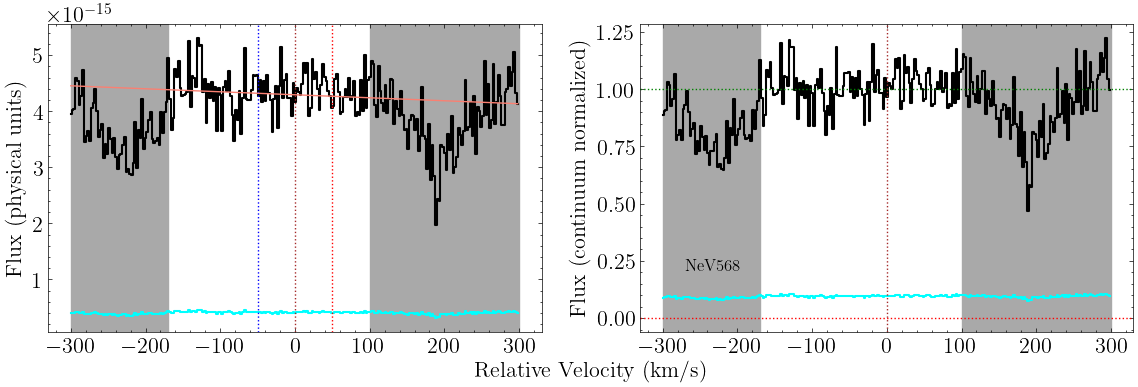

In [572]:
fig, ax = nev_568_fuv.plot_ion_transition_spec_cont()

In [573]:
nev_568_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [574]:
nev_568_fuv.get_upper_lim(20)

logN-1sig: 13.0
logN-2sig: 13.2
logN-3sig: 13.4


# NeVI

## NeVI 558 
Get NeVI 558 from COS FUV

In [261]:
nevi_558_fuv = ion_transition('NeVI', 558, 'Ne', z_sys, 'COS FUV')

In [262]:
nevi_558_fuv.grab_ion_transition_info()

In [263]:
nevi_558_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-200]])

In [264]:
nevi_558_fuv.cont_norm_flux(v_abs_range=[-80,100], degree=1)

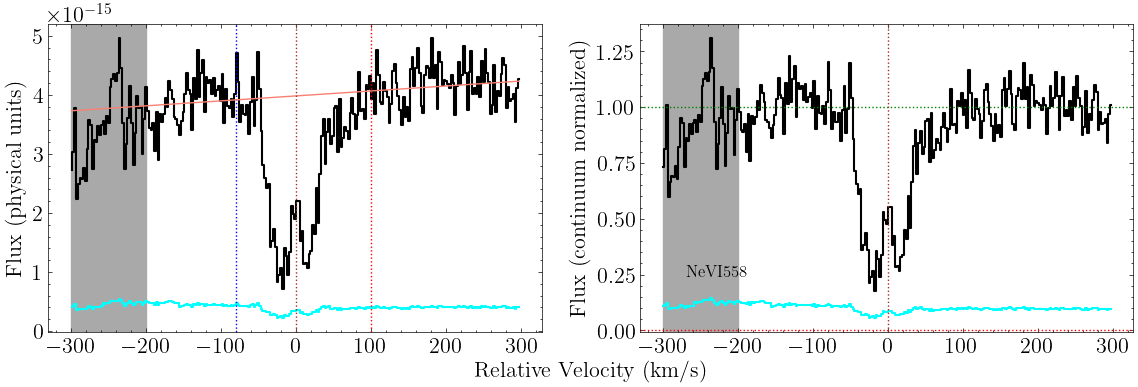

In [265]:
fig, ax = nevi_558_fuv.plot_ion_transition_spec_cont()

In [266]:
nevi_558_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [267]:
nevi_558_fuv.get_upper_lim(20)

logN-1sig: 13.0
logN-2sig: 13.2
logN-3sig: 13.4


In [270]:
nevi_558_fuv.get_upper_lim_data(20,0,logN_max=20)

logN-1sig: 15.2
logN-2sig: 15.2
logN-3sig: 15.3


# NeVIII

## NeVIII 770 (FUV)

In [271]:
neviii_770_fuv = ion_transition('NeVIII', 770, 'Ne', z_sys, 'COS FUV')

In [272]:
neviii_770_fuv.grab_ion_transition_info()

In [273]:
neviii_770_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-100,20],[120,140]])

In [274]:
neviii_770_fuv.cont_norm_flux(v_abs_range=[-80,80], degree=1)

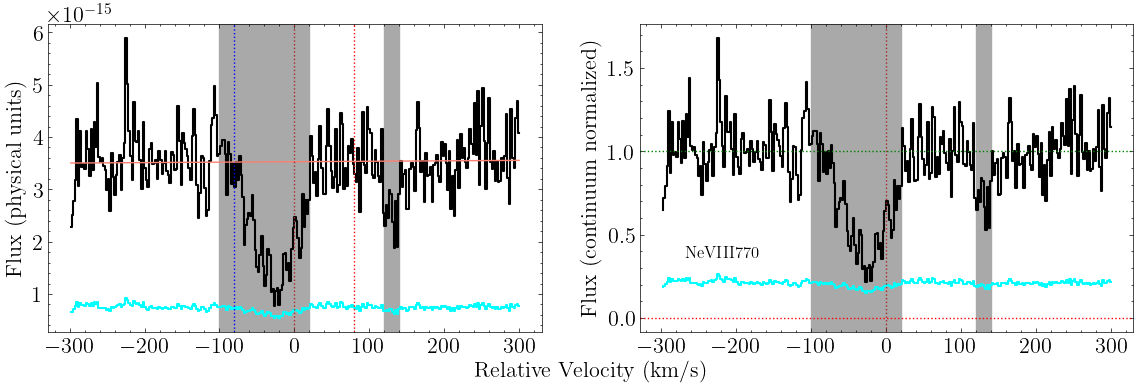

In [275]:
fig, ax = neviii_770_fuv.plot_ion_transition_spec_cont()

In [276]:
neviii_770_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [277]:
neviii_770_fuv.get_upper_lim(20)

logN-1sig: 13.1
logN-2sig: 13.4
logN-3sig: 13.5


In [279]:
neviii_770_fuv.get_upper_lim_data(20,0,logN_max=20)

logN-1sig: 14.5
logN-2sig: 14.5
logN-3sig: 14.6


## NeVIII 780 (FUV)

In [280]:
neviii_780_fuv = ion_transition('NeVIII', 780, 'Ne', z_sys, 'COS FUV')

In [281]:
neviii_780_fuv.grab_ion_transition_info()

In [282]:
neviii_780_fuv.grab_ion_transition_spec(spec_fits_list)

In [283]:
neviii_780_fuv.cont_norm_flux(v_abs_range=[-80,80], degree=1)

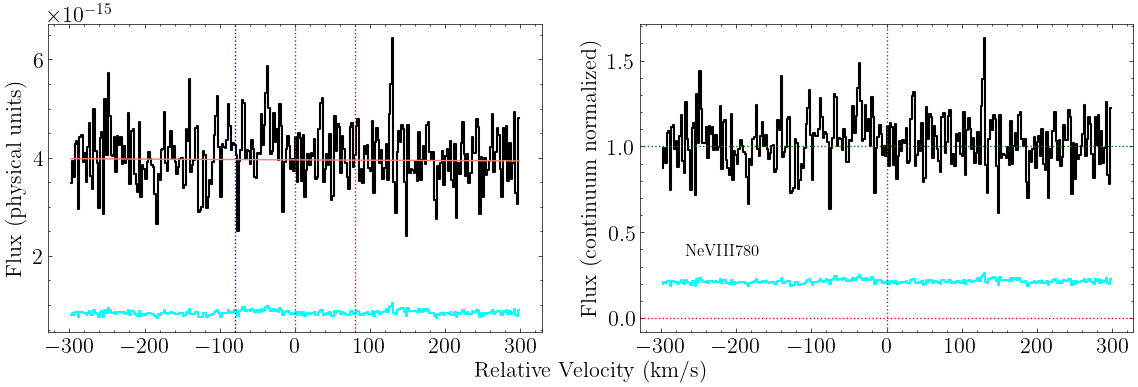

In [284]:
fig, ax = neviii_780_fuv.plot_ion_transition_spec_cont()

In [285]:
neviii_780_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [286]:
neviii_780_fuv.get_upper_lim(20)

logN-1sig: 13.5
logN-2sig: 13.7
logN-3sig: 13.9


In [288]:
neviii_780_fuv.get_upper_lim_data(20,0)

logN-1sig: 13.4
logN-2sig: 13.6
logN-3sig: 13.8


# MgX

## MgX 609 (FUV)

In [289]:
mgx_609_fuv = ion_transition('MgX', 609, 'Mg', z_sys, 'COS FUV')

In [290]:
mgx_609_fuv.grab_ion_transition_info()

In [291]:
mgx_609_fuv.grab_ion_transition_spec(spec_fits_list)

In [292]:
mgx_609_fuv.cont_norm_flux(v_abs_range=[-50,50], degree=1)

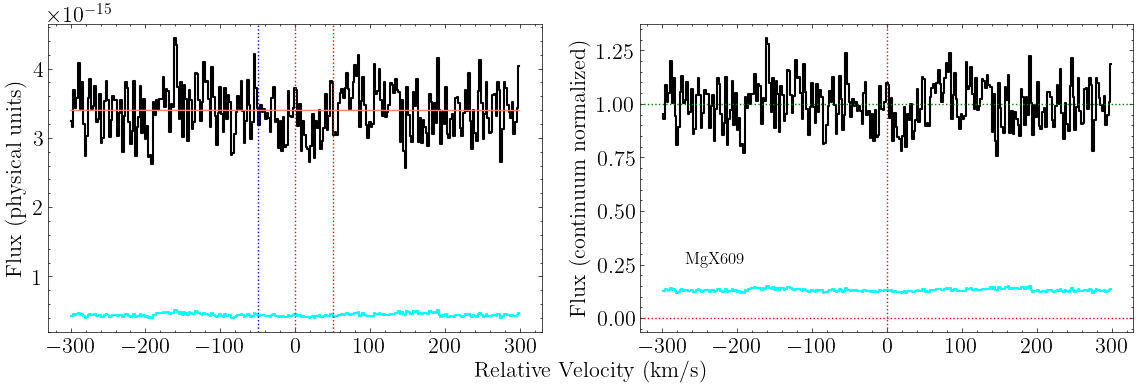

In [293]:
fig, ax = mgx_609_fuv.plot_ion_transition_spec_cont()

In [294]:
mgx_609_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [295]:
mgx_609_fuv.get_upper_lim(20)

logN-1sig: 13.2
logN-2sig: 13.4
logN-3sig: 13.6


In [296]:
mgx_609_fuv.get_upper_lim_data(20,0)

logN-1sig: 13.6
logN-2sig: 13.7
logN-3sig: 13.8


## MgX 624 (FUV)

In [297]:
mgx_624_fuv = ion_transition('MgX', 624, 'Mg', z_sys, 'COS FUV')

In [298]:
mgx_624_fuv.grab_ion_transition_info()

In [299]:
mgx_624_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-250],[200,300]])

In [300]:
mgx_624_fuv.cont_norm_flux(v_abs_range=[-80,40], degree=1)

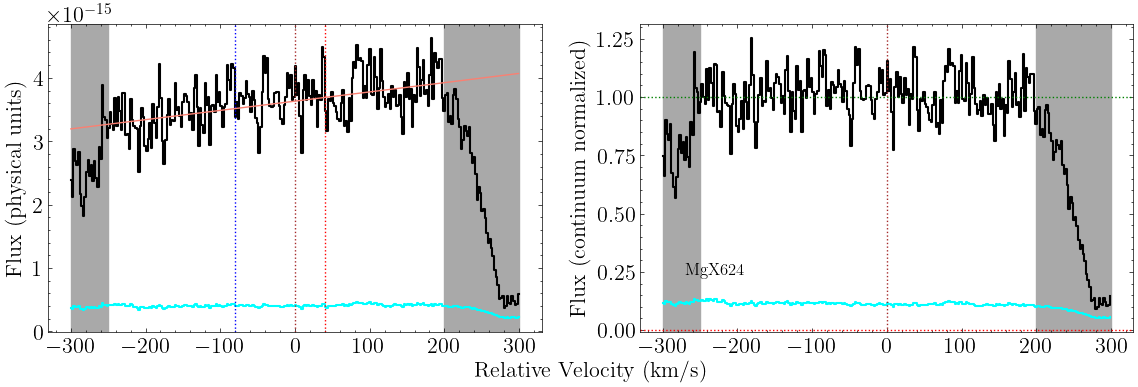

In [301]:
fig, ax = mgx_624_fuv.plot_ion_transition_spec_cont()

In [302]:
mgx_624_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [303]:
mgx_624_fuv.get_upper_lim(20)

logN-1sig: 13.4
logN-2sig: 13.6
logN-3sig: 13.8


In [304]:
mgx_624_fuv.get_upper_lim_data(20,0)

logN-1sig: 13.3
logN-2sig: 13.5
logN-3sig: 13.7


# AlII

## AlII 1670 (HIRES)

In [176]:
alii_1670_hires = ion_transition('AlII', 1670, 'Al', z_sys, 'HIRES')

In [177]:
alii_1670_hires.grab_ion_transition_info()

In [178]:
alii_1670_hires.grab_ion_transition_spec(spec_fits_list)

In [179]:
alii_1670_hires.cont_norm_flux(v_abs_range=[-80,80], degree=1)

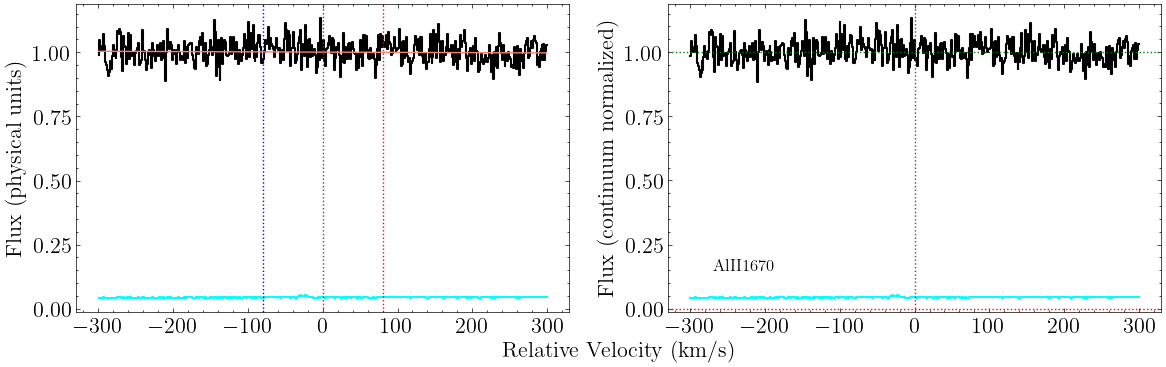

In [180]:
fig, ax = alii_1670_hires.plot_ion_transition_spec_cont()

In [181]:
alii_1670_hires.grab_ion_transition_lsf(lsf_fits_list)

In [182]:
alii_1670_hires.get_upper_lim(6)

logN-1sig: 10.6
logN-2sig: 10.8
logN-3sig: 10.9


# AlIII

## AlIII 1862 (HIRES)

In [183]:
aliii_1862_hires = ion_transition('AlIII', 1862, 'Al', z_sys, 'HIRES')

In [184]:
aliii_1862_hires.grab_ion_transition_info()

In [185]:
aliii_1862_hires.grab_ion_transition_spec(spec_fits_list)

In [186]:
aliii_1862_hires.cont_norm_flux(v_abs_range=[-80,80], degree=1)

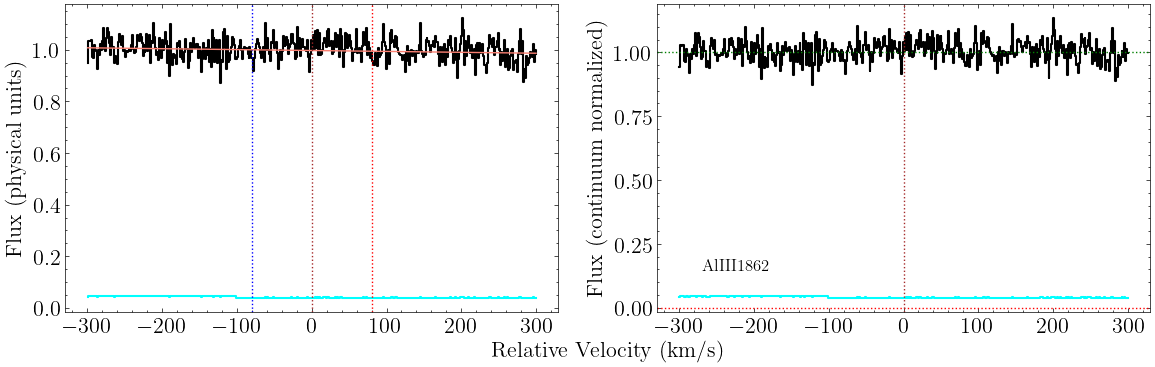

In [187]:
fig, ax = aliii_1862_hires.plot_ion_transition_spec_cont()

In [188]:
aliii_1862_hires.grab_ion_transition_lsf(lsf_fits_list)

In [189]:
aliii_1862_hires.get_upper_lim(6)

logN-1sig: 11.2
logN-2sig: 11.5
logN-3sig: 11.6


## AlIII 1854 (HIRES)

In [326]:
aliii_1854_hires = ion_transition('AlIII', 1854, 'Al', z_sys, 'HIRES')

In [327]:
aliii_1854_hires.grab_ion_transition_info()

In [328]:
aliii_1854_hires.grab_ion_transition_spec(spec_fits_list)

In [329]:
aliii_1854_hires.cont_norm_flux(v_abs_range=[-80,80], degree=1)

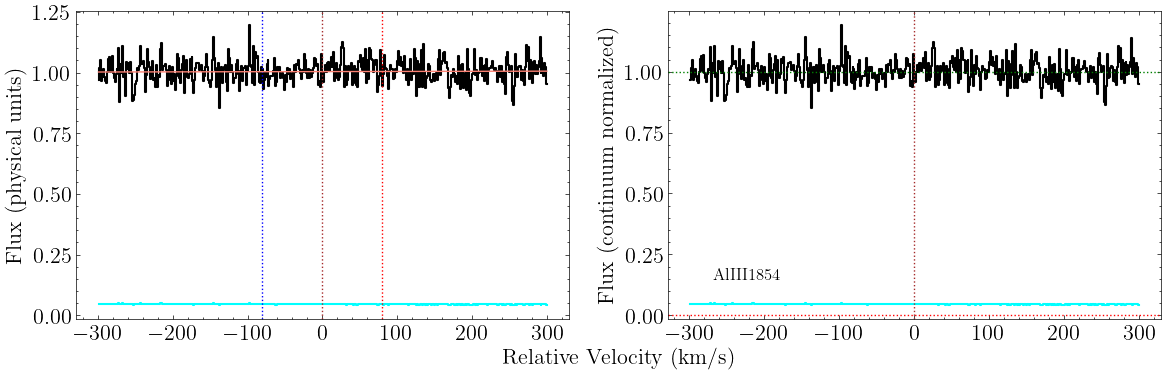

In [330]:
fig, ax = aliii_1854_hires.plot_ion_transition_spec_cont()

In [331]:
aliii_1854_hires.grab_ion_transition_lsf(lsf_fits_list)

In [332]:
aliii_1854_hires.get_upper_lim(6)

logN-1sig: 11.0
logN-2sig: 11.2
logN-3sig: 11.4


# SiII

## SiII 1020 (STIS)

In [333]:
siii_1083_stis = ion_transition('SiII', 1020, 'Si', z_sys, 'STIS')

In [334]:
siii_1083_stis.grab_ion_transition_info()

In [335]:
siii_1083_stis.grab_ion_transition_spec(spec_fits_list)

In [336]:
siii_1083_stis.cont_norm_flux(v_abs_range=[-80,140], degree=1)

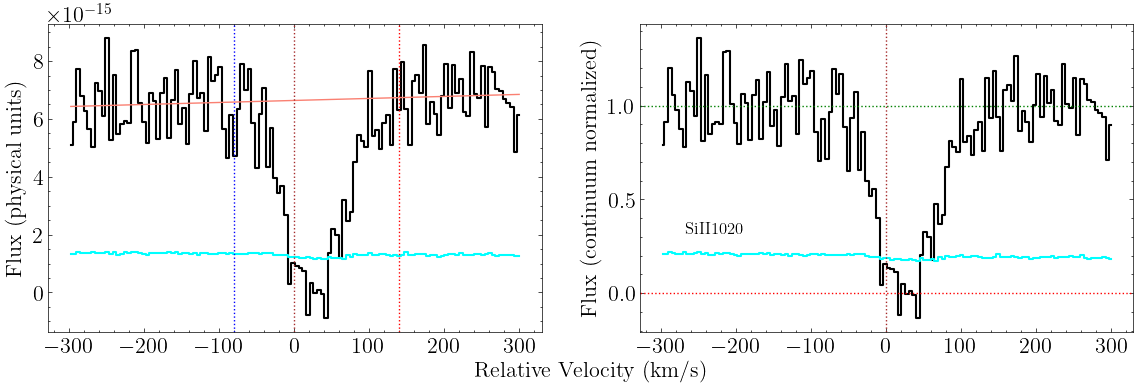

In [337]:
fig, ax = siii_1083_stis.plot_ion_transition_spec_cont()

In [338]:
siii_1083_stis.grab_ion_transition_lsf(lsf_fits_list)

In [339]:
siii_1083_stis.get_upper_lim(6,logN_max=20)

logN-1sig: 13.8
logN-2sig: 14.0
logN-3sig: 14.2


In [340]:
siii_1083_stis.get_upper_lim_data(6,-150,-200,-100,logN_max=50)

logN-1sig: 13.9
logN-2sig: 14.2
logN-3sig: 14.4


In [341]:
siii_1083_stis.get_upper_lim_data(6,0,logN_max=50)

logN-1sig: 19.3
logN-2sig: 19.4
logN-3sig: 19.4


# SiIII

## SiIII 1206 (STIS)

In [342]:
siiii_1206_stis = ion_transition('SiIII', 1206, 'Si', z_sys, 'STIS')

In [343]:
siiii_1206_stis.grab_ion_transition_info()

In [344]:
siiii_1206_stis.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-180],[200,300]])

In [345]:
siiii_1206_stis.cont_norm_flux(v_abs_range=[-30,30], degree=1)

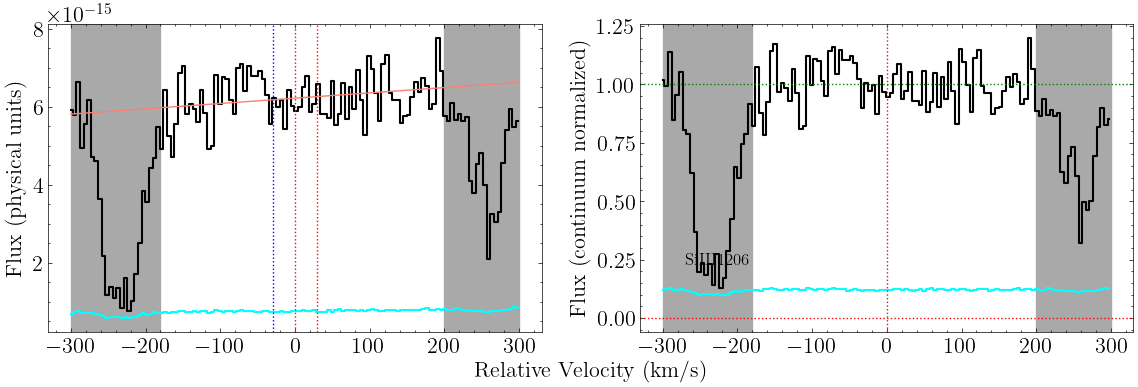

In [346]:
fig, ax = siiii_1206_stis.plot_ion_transition_spec_cont()

In [347]:
siiii_1206_stis.grab_ion_transition_lsf(lsf_fits_list)

In [348]:
siiii_1206_stis.get_upper_lim(6)

logN-1sig: 11.5
logN-2sig: 11.8
logN-3sig: 11.9


In [349]:
siiii_1206_stis.get_upper_lim_data(6,0)

logN-1sig: 11.6
logN-2sig: 11.8
logN-3sig: 12.0


# SiIV

## SiIV 1393 (HIRES)

In [350]:
siiv_1393_hires = ion_transition('SiIV', 1393, 'Si', z_sys, 'HIRES')

In [351]:
siiv_1393_hires.grab_ion_transition_info()

In [352]:
siiv_1393_hires.grab_ion_transition_spec(spec_fits_list)

In [353]:
siiv_1393_hires.cont_norm_flux(v_abs_range=[-40,40], degree=1)

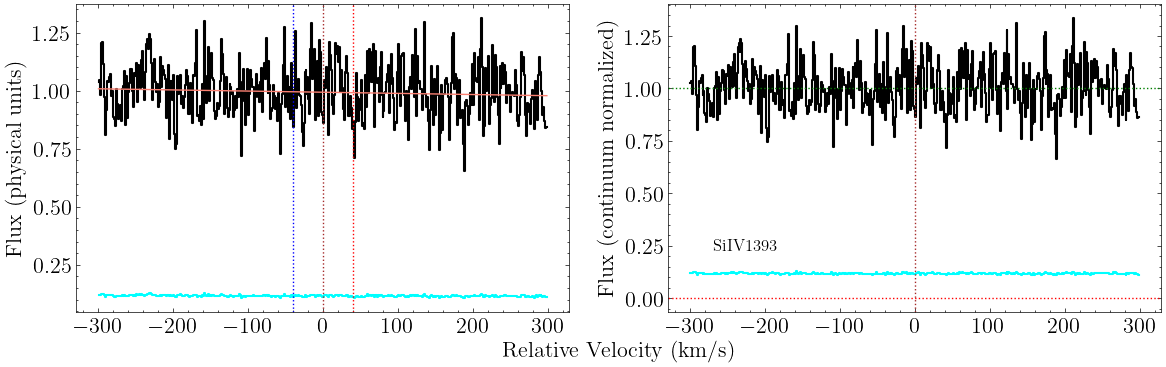

In [354]:
fig, ax = siiv_1393_hires.plot_ion_transition_spec_cont()

In [355]:
siiv_1393_hires.grab_ion_transition_lsf(lsf_fits_list)

In [357]:
siiv_1393_hires.get_upper_lim(6)

logN-1sig: 11.6
logN-2sig: 11.8
logN-3sig: 12.0


In [358]:
siiv_1393_hires.get_upper_lim_data(6,0)

logN-1sig: 11.5
logN-2sig: 11.8
logN-3sig: 11.9


## SiIV 1402 (HIRES)

In [359]:
siiv_1402_hires = ion_transition('SiIV', 1402, 'Si', z_sys, 'HIRES')

In [360]:
siiv_1402_hires.grab_ion_transition_info()

In [361]:
siiv_1402_hires.grab_ion_transition_spec(spec_fits_list)

In [362]:
siiv_1402_hires.cont_norm_flux(v_abs_range=[-30,30], degree=1)

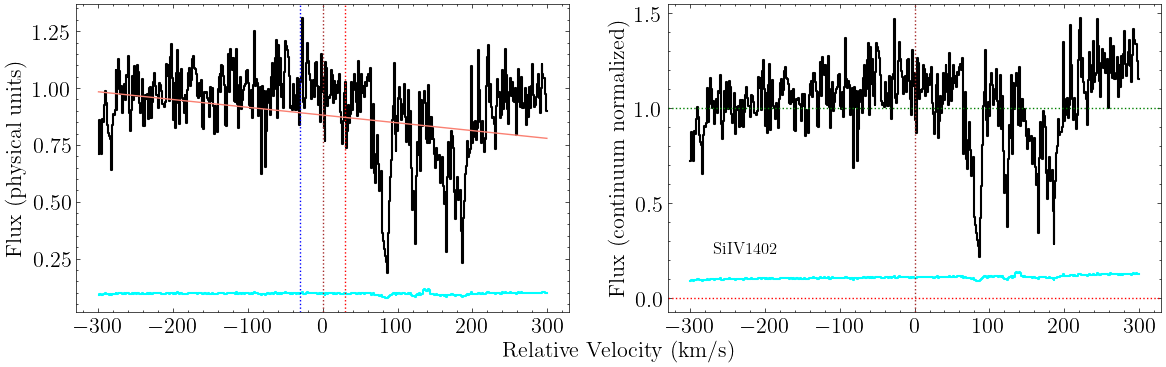

In [363]:
fig, ax = siiv_1402_hires.plot_ion_transition_spec_cont()

In [364]:
siiv_1402_hires.grab_ion_transition_lsf(lsf_fits_list)

In [365]:
siiv_1402_hires.get_upper_lim(6)

logN-1sig: 11.9
logN-2sig: 12.1
logN-3sig: 12.3


In [366]:
siiv_1402_hires.get_upper_lim_data(6,0,-40,40)

logN-1sig: 11.4
logN-2sig: 11.7
logN-3sig: 11.9


# SIV

## SIV 1062 (STIS)

In [367]:
siv_1062_stis = ion_transition('SIV', 1062, 'S', z_sys, 'STIS')

In [368]:
siv_1062_stis.grab_ion_transition_info()

In [369]:
siv_1062_stis.grab_ion_transition_spec(spec_fits_list, masks=[[0,200]])

In [370]:
siv_1062_stis.cont_norm_flux(v_abs_range=[-80,80], degree=1)

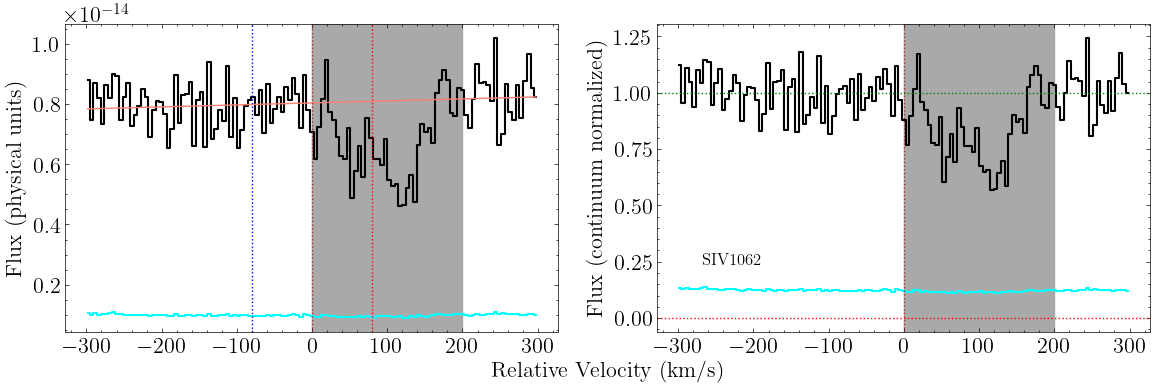

In [371]:
fig, ax = siv_1062_stis.plot_ion_transition_spec_cont()

In [372]:
siv_1062_stis.grab_ion_transition_lsf(lsf_fits_list)

In [375]:
siv_1062_stis.get_upper_lim(6)

logN-1sig: 13.1
logN-2sig: 13.3
logN-3sig: 13.5


In [376]:
siv_1062_stis.get_upper_lim_data(6,0,-20,20)

logN-1sig: 13.4
logN-2sig: 13.6
logN-3sig: 13.7


## SIV 748

In [377]:
siv_748_fuv = ion_transition('SIV', 748, 'S', z_sys, 'COS FUV')

In [378]:
siv_748_fuv.grab_ion_transition_info()

In [379]:
siv_748_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-120]])

In [380]:
siv_748_fuv.cont_norm_flux(v_abs_range=[-40,40], degree=1)

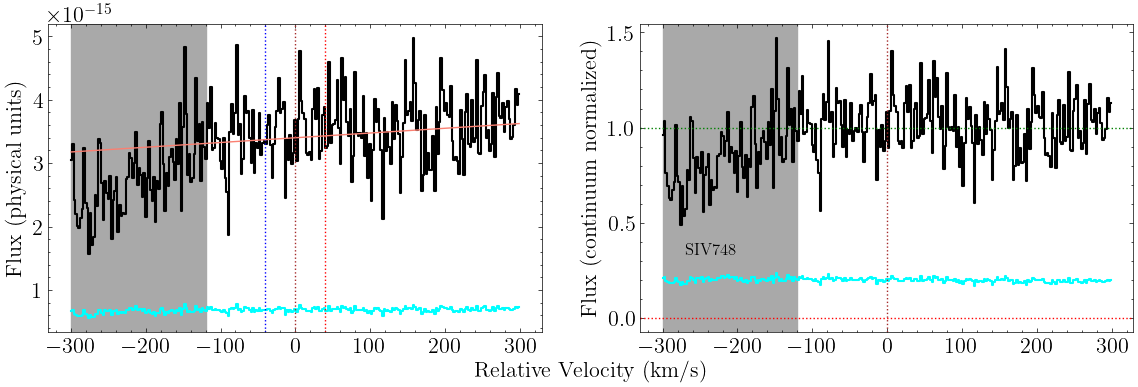

In [381]:
fig, ax = siv_748_fuv.plot_ion_transition_spec_cont()

In [382]:
siv_748_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [383]:
siv_748_fuv.get_upper_lim(6)

logN-1sig: 12.5
logN-2sig: 12.7
logN-3sig: 12.9


In [384]:
siv_748_fuv.get_upper_lim_data(6,0)

logN-1sig: 12.4
logN-2sig: 12.6
logN-3sig: 12.8


# SV

## SV 786

In [385]:
sv_786_fuv = ion_transition('SV', 786, 'S', z_sys, 'COS FUV')

In [386]:
sv_786_fuv.grab_ion_transition_info()

In [387]:
sv_786_fuv.grab_ion_transition_spec(spec_fits_list)

In [388]:
sv_786_fuv.cont_norm_flux(v_abs_range=[-80,80], degree=1)

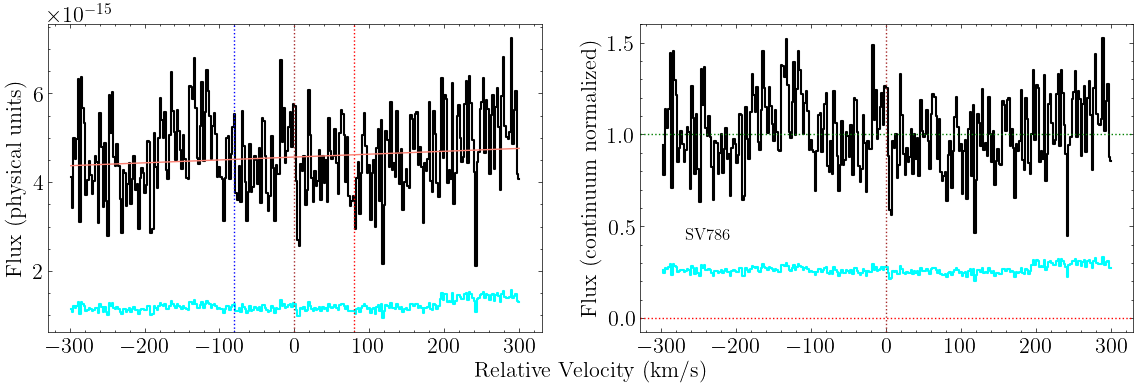

In [389]:
fig, ax = sv_786_fuv.plot_ion_transition_spec_cont()

In [390]:
sv_786_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [391]:
sv_786_fuv.get_upper_lim(6)

logN-1sig: 12.1
logN-2sig: 12.3
logN-3sig: 12.5


In [392]:
sv_786_fuv.get_upper_lim_data(6,0)

logN-1sig: 12.2
logN-2sig: 12.5
logN-3sig: 12.6


# SVI

## SVI 933 (STIS)
Get SVI 933 from COS STIS

In [391]:
svi_933_stis = ion_transition('SVI', 933, 'S', z_sys, 'STIS')

In [392]:
svi_933_stis.grab_ion_transition_info()

In [393]:
svi_933_stis.grab_ion_transition_spec(spec_fits_list, masks=[[100,300]])

In [394]:
svi_933_stis.cont_norm_flux(v_abs_range=[-50,50], degree=1)

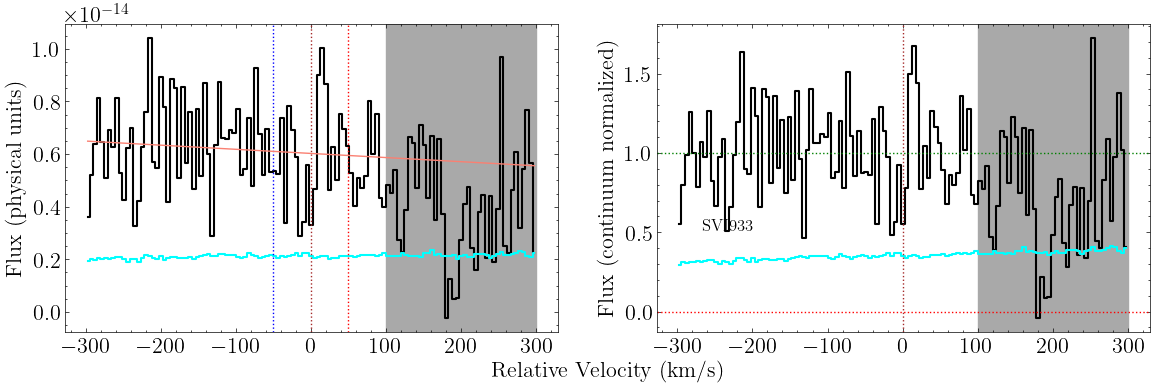

In [395]:
fig, ax = svi_933_stis.plot_ion_transition_spec_cont()

In [396]:
svi_933_stis.grab_ion_transition_lsf(lsf_fits_list)

In [397]:
svi_933_stis.get_upper_lim(20)

logN-1sig: 12.9
logN-2sig: 13.1
logN-3sig: 13.3


In [399]:
svi_933_stis.get_upper_lim_data(20, 0, logN_max=20)

logN-1sig: 13.0
logN-2sig: 13.2
logN-3sig: 13.4


## SVI 944 (STIS)
Get SVI 944 from COS STIS

In [400]:
svi_944_stis = ion_transition('SVI', 944, 'S', z_sys, 'STIS')

In [401]:
svi_944_stis.grab_ion_transition_info()

In [402]:
svi_944_stis.grab_ion_transition_spec(spec_fits_list)

In [403]:
svi_944_stis.cont_norm_flux(v_abs_range=[-150,200], degree=1)

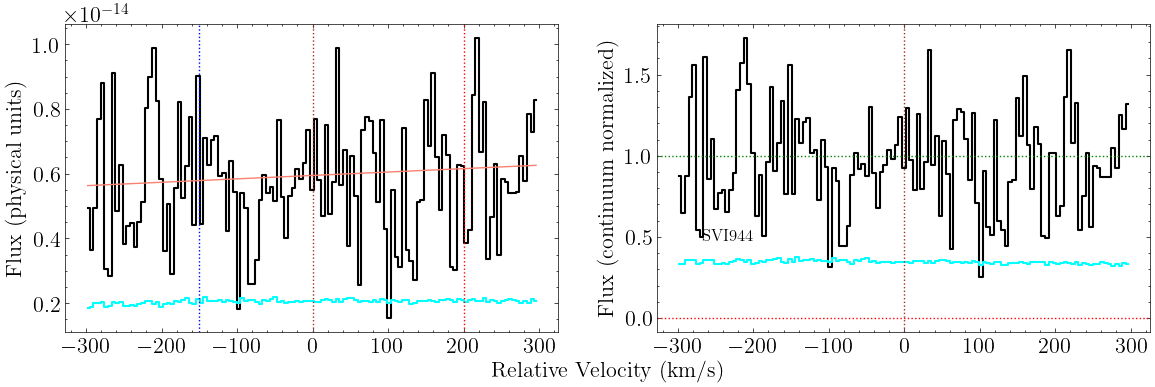

In [404]:
fig, ax = svi_944_stis.plot_ion_transition_spec_cont()

In [405]:
svi_944_stis.grab_ion_transition_lsf(lsf_fits_list)

In [406]:
svi_944_stis.get_upper_lim(20)

logN-1sig: 13.2
logN-2sig: 13.4
logN-3sig: 13.6


# FeII

## FeII 2382 (HIRES)

In [393]:
feii_2382_hires = ion_transition('FeII', 2382, 'Fe', z_sys, 'HIRES')

In [394]:
feii_2382_hires.grab_ion_transition_info()

In [395]:
feii_2382_hires.grab_ion_transition_spec(spec_fits_list)

In [396]:
feii_2382_hires.cont_norm_flux(v_abs_range=[-80,80], degree=1)

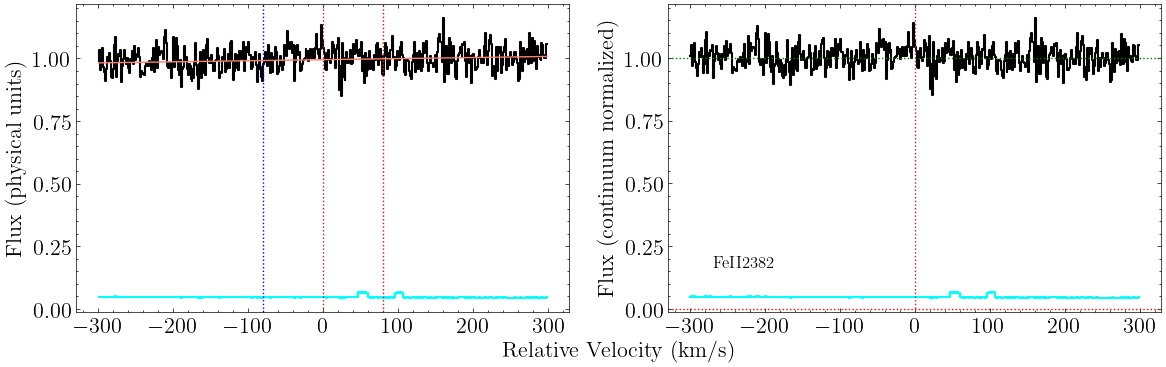

In [397]:
fig, ax = feii_2382_hires.plot_ion_transition_spec_cont()

In [398]:
feii_2382_hires.grab_ion_transition_lsf(lsf_fits_list)

In [399]:
feii_2382_hires.get_upper_lim(6)

logN-1sig: 11.2
logN-2sig: 11.4
logN-3sig: 11.5


## FeII 2344 (HIRES)

In [400]:
feii_2344_hires = ion_transition('FeII', 2344, 'Fe', z_sys, 'HIRES')

In [401]:
feii_2344_hires.grab_ion_transition_info()

In [402]:
feii_2344_hires.grab_ion_transition_spec(spec_fits_list)

In [403]:
feii_2344_hires.cont_norm_flux(v_abs_range=[-80,80], degree=1)

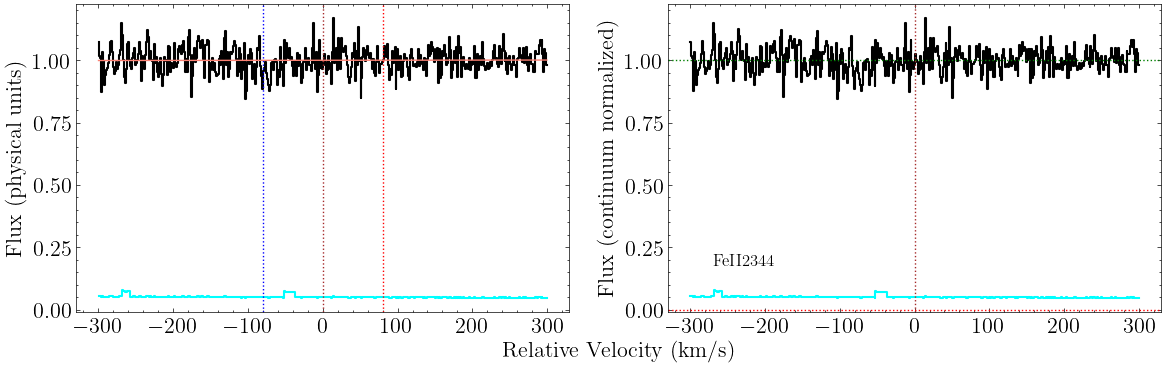

In [404]:
fig, ax = feii_2344_hires.plot_ion_transition_spec_cont()

In [405]:
feii_2344_hires.grab_ion_transition_lsf(lsf_fits_list)

In [406]:
feii_2344_hires.get_upper_lim(6)

logN-1sig: 11.6
logN-2sig: 11.9
logN-3sig: 12.0
